<a href="https://colab.research.google.com/github/YooraHi/YooraHi/blob/main/Ensemble_modeling_pratice_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detailed and typical solution (ensemble modeling)**

In [40]:
import numpy as np #numpy 패키지를 np라는 이름으로 임포트합니다. numpy는 수치 연산을 위한 파이썬 라이브러리로, 배열 처리 및 다양한 수학 함수들을 제공
import pandas as pd #pandas는 데이터 분석과 조작을 위한 파이썬 라이브러리로, 데이터프레임을 사용하여 데이터를 효율적으로 관리
import matplotlib.pyplot as plt #matplotlib는 데이터 시각화를 위한 라이브러리로, 그래프와 플롯을 생성하는 데 사용
import seaborn as sns
import warnings #파이썬의 기본 경고 모듈인 warnings를 임포트합니다. 이는 경고 메시지를 제어하고 필터링하는 데 사용

# (1) Importing the data :


In [41]:
#reading the data
def read_data():
    train_data = pd.read_csv("/boot/kaggle/input/titanic/train.csv")

    #read_data 라는 함수를 정의합니다. 이 함수는 Titanic 데이터셋의 train.csv 파일을 읽어서 train_data라는 변수에 저장합니다. pd.read_csv 함수는 주어진 파일 경로에서 CSV 파일을 읽어 데이터프레임으로 변환합니다.

    print("Train data imported successfully!!") #train_data가 성공적으로 임포트되었음을 알리는 메시지를 출력합니다.
    print("-"*50)  #시각적 구분을 위해 50개의 하이픈(-) 문자를 출력합니다. 이는 출력된 내용을 더 쉽게 구분할 수 있게 합니다.
    test_data = pd.read_csv("/boot/kaggle/input/titanic/test.csv") #test_data라는 변수에 동일한 경로의 test.csv 파일을 읽어서 저장합니다.
    print("Test data imported successfully!!")
    return train_data , test_data

train_data , test_data = read_data()
combine = [train_data , test_data]

Train data imported successfully!!
--------------------------------------------------
Test data imported successfully!!


# (2) Discovering the data :


In [42]:
train_data.head() #데이터프레임의 첫 5개 행을 출력합니다. 이는 데이터의 구조와 일부 샘플 데이터를 빠르게 확인할 수 있는 방법. head() 메서드는 기본적으로 첫 5개 행을 반환하지만, 인수를 통해 반환할 행의 수를 지정할 수도 있음.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


코드 리뷰

데이터 확인:

train_data.head()를 사용하여 데이터프레임의 처음 몇 개의 행을 출력함으로써, 데이터의 기본 구조, 열 이름, 데이터 유형, 누락된 값 등을 빠르게 파악할 수 있습니다.
초기 데이터 탐색:

초기 데이터를 탐색하는 단계에서, head() 메서드를 사용하여 데이터가 올바르게 로드되었는지, 데이터의 주요 특성이 무엇인지 확인할 수 있습니다. 이는 데이터 전처리 과정에서 중요한 첫 단계입니다.
데이터 이해:

데이터의 샘플을 시각적으로 확인함으로써, 어떤 전처리 작업이 필요한지, 예를 들어 결측값 처리, 데이터 타입 변환, 새로운 특징 생성 등을 결정하는 데 도움이 됩니다.

In [43]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


설명:
이미지에서 제공된 test_data.head()의 출력은 Titanic 데이터셋의 테스트 데이터의 첫 5개 행을 보여줍니다. 각 열의 데이터 유형과 몇 가지 기본 데이터를 확인할 수 있습니다.

데이터 설명:
-PassengerId: 승객의 고유 식별자
-Pclass: 객실 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)
-Name: 승객의 이름
-Sex: 성별
-Age: 나이
-SibSp: 함께 탑승한 형제자매 또는 배우자 수
-Parch: 함께 탑승한 부모 또는 자녀 수
-Ticket: 티켓 번호
-Fare: 운임 요금
-Cabin: 객실 번호 (일부는 결측값)
-Embarked: 탑승한 항구 (C = Cherbourg, Q = Queenstown, S = Southampton)
-코드 리뷰 및 제안:
-결측값 확인 및 처리 필요성:

-Cabin 열에 결측값이 존재합니다. 이 결측값을 처리해야 합니다.
-Embarked 열도 결측값이 포함될 수 있습니다. 결측값 처리가 필요합니다.
-데이터 타입 확인:

-모든 열이 올바른 데이터 타입을 가지고 있는지 확인해야 합니다. 예를 들어, Age -열은 숫자형 데이터여야 하고, Embarked 열은 범주형 데이터여야 합니다.

-데이터 전처리:

-범주형 데이터 (예: Sex, Embarked)는 모델링을 위해 인코딩되어야 할 수 있습니다.
숫자형 데이터의 이상치(outliers)를 확인하고 처리해야 할 수 있습니다.

추가 탐색 및 시각화:

데이터의 통계 정보를 확인하고, 각 열의 분포를 시각화하여 데이터의 특성을 더 잘 이해할 수 있습니다.

In [44]:
# Discovering the features:


print("Train data features are:\n")
print(train_data.columns.values)
print('\n' ,"="*80 , '\n')
print("Test data features are:\n")
print(test_data.columns.values)

Train data features are:

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Test data features are:

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


코드 리뷰:
주석 및 구분선:

주석(#)을 사용하여 코드 블록을 구분하고 설명을 추가한 점이 좋습니다. 이는 코드의 가독성을 높여줍니다.
데이터셋 특성 출력:

train_data.columns.values와 test_data.columns.values를 사용하여 각 데이터프레임의 열 이름을 배열 형태로 출력합니다. 이는 데이터셋의 구조를 빠르게 파악하는 데 유용합니다.

출력 형식:
가독성을 위해 각 출력 사이에 구분선을 추가한 점이 좋습니다. 이는 출력된 내용을 쉽게 구분할 수 있게 합니다.

**개선 사항:columns.values 대신 columns 속성을 사용하는 것이 더 간결할 수 있습니다. 두 속성은 같은 결과를 반환하지만, columns 속성이 더 직관적입니다.**
추가적으로, train_data와 test_data의 열 이름을 비교하여 공통 특성 또는 다른 특성을 확인하는 것도 유용할 수 있습니다.

In [45]:
# Discovering the features types:


train_data.info() #train_data.info()와 test_data.info()를 사용하여 각 데이터프레임의 요약 정보를 출력
print('_'*40 , '\n')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passeng

설명:
이 코드 블록은 train_data와 test_data 데이터프레임의 구조 및 각 열의 데이터 타입, 결측값 등을 확인하기 위해 사용됩니다. info() 메서드는 데이터프레임의 기본 정보를 요약해서 출력합니다.

코드 리뷰:
주석 및 구분선:

주석(#)을 사용하여 코드 블록을 구분하고 설명을 추가한 점이 좋습니다. 이는 코드의 가독성을 높여줍니다.   


데이터셋 정보 출력:

train_data.info()와 test_data.info()를 사용하여 각 데이터프레임의 요약 정보를 출력합니다. 이 메서드는 각 열의 이름, 데이터 타입, 비어 있지 않은 값의 개수, 메모리 사용량 등을 보여줍니다.

출력 형식:

두 출력 사이에 구분선을 추가하여 출력 내용을 쉽게 구분할 수 있게 한 점이 좋습니다.

개선 사항: 코드 자체에는 큰 문제가 없으나, 출력 결과를 이해하기 쉽도록 추가 설명을 제공할 수 있습니다.
print() 함수의 인수를 간결하게 정리할 수 있습니다.

데이터를 더 잘 이해하기 위해 각 열의 통계 요약을 포함할 수도 있습니다.

Features 에 대한 확인 결과:

테스트 데이터의 특성은 훈련 데이터의 특성과 동일하나, 'Survived' 특성은 제외되는데, 이유는 이 Feature가 target(특성)이기 때문임.  


**Features types:**

1.Categorical(범주형):

*   Pclass (순서형,ordinal)
*   Name (명목형,nominal)
*   Sex (명목형,nominal)

2.Numerical(수치형):
Age (연속형,continuous)
Fare (연속형,continuous)
SibSp (이산형,discrete)
Parch (이산형,discrete)

3.Mixed(혼합형):

* Ticket (숫자형 및 문자형, numeric and alphanumeric)
* Cabin (문자형, alphanumeric)

Insights(인사이트):  
Features types are very important for EDA step.

--------------------------------------------------------------------------------

### Ensemble Model에서 특성 유형이 EDA(탐색적 데이터 분석) 단계에서 중요한 이유:

1. **모델 선택 및 적용**:
   - 특성의 유형에 따라 어떤 모델이 더 적합한지 결정하는 데 도움이 됩니다. 예를 들어, 범주형 변수를 처리할 수 있는 모델(예: Decision Tree, Random Forest)과 수치형 변수를 처리할 수 있는 모델(예: Linear Regression)을 선택할 때 중요합니다.

2. **데이터 전처리**:
   - 각 특성의 유형에 따라 다른 전처리 방법이 필요합니다. 예를 들어, 범주형 데이터는 인코딩(예: One-Hot Encoding)해야 하고, 수치형 데이터는 정규화 또는 표준화가 필요할 수 있습니다.
   - 혼합형 데이터(예: `Ticket`, `Cabin`)는 숫자와 문자가 혼합되어 있어, 이를 적절히 분리하거나 새로운 특성으로 변환하는 과정이 필요합니다.

3. **특성 공학(Feature Engineering)**:
   - 각 특성의 유형에 따라 새로운 유용한 특성을 생성할 수 있습니다. 예를 들어, `Name` 특성에서 타이틀을 추출하거나, `Cabin` 특성에서 데크 정보를 추출하는 등의 작업이 가능합니다.
   - 범주형 특성의 경우, 빈도 또는 순위 기반 인코딩을 적용할 수 있습니다.

4. **결측값 처리**:
   - 특성 유형에 따라 결측값을 처리하는 방법이 달라집니다. 예를 들어, 수치형 특성의 결측값은 평균 또는 중위수로 대체할 수 있지만, 범주형 특성은 최빈값 또는 새로운 카테고리로 대체할 수 있습니다.

5. **데이터 시각화**:
   - 특성의 유형에 따라 적절한 시각화 방법을 선택할 수 있습니다. 예를 들어, 수치형 데이터는 히스토그램이나 박스플롯으로 시각화하고, 범주형 데이터는 막대 그래프로 시각화할 수 있습니다.
   - 데이터 시각화를 통해 각 특성의 분포를 이해하고, 특성과 타겟 변수 간의 관계를 파악할 수 있습니다.

6. **모델 성능 향상**:
   - 특성 유형에 따라 데이터 전처리와 특성 공학을 잘 수행하면 모델의 성능이 크게 향상될 수 있습니다. 올바른 전처리와 특성 변환은 모델이 데이터의 패턴을 더 잘 학습하게 도와줍니다.

### 요약:
EDA 단계에서 특성 유형을 잘 파악하고 적절히 처리하는 것은 데이터 전처리, 특성 공학, 모델 선택, 결측값 처리, 데이터 시각화 등 다양한 측면에서 중요합니다. 이를 통해 더 나은 데이터 이해와 모델 성능 향상을 이끌어낼 수 있습니다.

In [46]:
# Discovering the missed values:


print("Train data missed values:\n")
print(train_data.isnull().sum()) #train_data.isnull().sum()과 test_data.isnull().sum()을 사용하여 각 데이터프레임의 열별 결측값 개수를 계산하고 출력 , 결측값을 확인함으로써, 데이터 전처리 과정에서 어떤 열을 처리해야 하는지 파악할 수 있음
print('\n','_'*40 , '\n')
print("Test data missed values:")
print(test_data.isnull().sum())

Train data missed values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 ________________________________________ 

Test data missed values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


설명:
이 코드 블록은 train_data와 test_data 데이터프레임에서 결측값의 개수를 확인하고 출력합니다. 결측값을 확인하는 것은 데이터 전처리 단계에서 매우 중요한 부분입니다.


코드 리뷰:
주석 및 구분선:


주석을 사용하여 코드 블록을 설명한 점이 좋습니다. 이는 코드의 가독성을 높여줍니다.

결측값 확인:

train_data.isnull().sum()과 test_data.isnull().sum()을 사용하여 각 데이터프레임의 열별 결측값 개수를 계산하고 출력합니다.
결측값을 확인함으로써, 데이터 전처리 과정에서 어떤 열을 처리해야 하는지 파악할 수 있습니다.

출력 형식:

각 출력 사이에 구분선을 추가하여 출력 내용을 쉽게 구분할 수 있게 한 점이 좋습니다.

개선 사항:


출력 형식을 좀 더 깔끔하게 정리할 수 있습니다.
결측값의 비율을 함께 출력하면 더 유용할 수 있습니다.

첫 번째 이미지 (Train data missed values):

이 이미지는 train_data 데이터프레임의 결측값 개수를 보여줍니다. 각 열에 대해 결측값의 개수가 다음과 같습니다:


PassengerId: 0개

Survived: 0개

Pclass: 0개

Name: 0개

Sex: 0개

Age: 177개

SibSp: 0개

Parch: 0개

Ticket: 0개

Fare: 0개

Cabin: 687개

Embarked: 2개


두 번째 이미지 (Test data missed values):

이 이미지는 test_data 데이터프레임의 결측값 개수를 보여줍니다. 각 열에 대해 결측값의 개수가 다음과 같습니다:


PassengerId: 0개

Pclass: 0개

Name: 0개

Sex: 0개

Age: 86개

SibSp: 0개

Parch: 0개

Ticket: 0개

Fare: 1개

Cabin: 327개

Embarked: 0개


리뷰 및 결론:

Train Data:

Age: 177개의 결측값이 있으며, 이는 데이터의 약 19.87%에 해당합니다.

Cabin: 687개의 결측값이 있으며, 이는 데이터의 약 77.10%에 해당합니다. 이 열은 대부분 결측값이므로 적절한 처리 방법이 필요합니다.

Embarked: 2개의 결측값이 있으며, 이는 데이터의 약 0.22%에 해당합니다.


Test Data:

Age: 86개의 결측값이 있으며, 이는 데이터의 약 20.57%에 해당합니다.

Fare: 1개의 결측값이 있으며, 이는 데이터의 약 0.24%에 해당합니다.

Cabin: 327개의 결측값이 있으며, 이는 데이터의 약 78.23%에 해당합니다. 이 열 역시 대부분 결측값이므로 적절한 처리 방법이 필요합니다.

결측값 처리 제안:
Age: 평균값이나 중위수로 대체하거나 예측 모델을 사용하여 결측값을 대체할 수 있습니다.
Cabin: 결측값이 너무 많으므로 이 열을 제거하거나, 결측값을 대체할 방법을 찾아야 합니다. 예를 들어, Cabin 열의 첫 글자가 데크를 나타낼 수 있으므로 이를 기반으로 결측값을 대체할 수 있습니다.
Embarked: 최빈값으로 대체할 수 있습니다.
Fare: 평균값으로 대체할 수 있습니다.









In [47]:
# Discovering the numerical data distribution :
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**수치형 데이터 분포 발견 결과:**

-이 데이터의 생존율은 38.3%임.

-승객의 75% 이상이 38세 이하임.

-노인 승객은 매우 적음.

-대부분의 승객은 혼자 여행함.

-운임(Fare) 특성에 몇몇 이상치(outliers)가 존재함.

**Insight:**
-나이(Age) 특성은 오른쪽으로 치우쳐 있으므로, 결측값을 채울 때 평균값을 사용하지 않음.

-운임(Fare), 나이(Age), 형제/배우자(SibSp) 및 부모/자녀(Parch) 특성에 이상치가 있음.

 *이는 탐색적 데이터 분석(EDA) 단계에서 영향을 줄 수 있음.

In [48]:
# Discovering the categorical data distribution :


train_data.describe(include=['O']) #describe(include=['O'])는 오브젝트 타입(문자열, 범주형 데이터 등)의 열에 대한 요약 통계를 제공

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


설명:
이 코드 블록은 train_data 데이터프레임의 범주형(categorical) 데이터의 분포를 요약해서 보여줍니다. describe(include=['O'])는 오브젝트 타입(문자열, 범주형 데이터 등)의 열에 대한 요약 통계를 제공합니다.


코드 리뷰:
주석 및 구분선:

주석을 사용하여 코드 블록을 설명하고 구분한 점이 좋습니다. 이는 코드의 가독성을 높여줍니다.

범주형 데이터 요약:

train_data.describe(include=['O'])를 사용하여 범주형 데이터의 기본 통계 정보를 출력합니다. 여기에는 각 열의 개수(count), 고유값(unique) 수, 최빈값(top), 최빈값의 빈도(freq)가 포함됩니다.

출력 형식:

범주형 데이터의 분포를 확인할 수 있어 데이터 탐색 단계에서 매우 유용합니다.

출력된 표에 대한 리뷰:
표 내용:
Name:
총 891개의 값이 있으며, 모두 고유값입니다(unique: 891).
최빈값(top)은 Braund, Mr. Owen Harris로, 빈도(freq)는 1입니다.

Sex:
총 891개의 값이 있으며, 2개의 고유값이 있습니다(unique: 2).
최빈값(top)은 male로, 빈도(freq)는 577입니다.

Ticket:
총 891개의 값이 있으며, 681개의 고유값이 있습니다(unique: 681).
최빈값(top)은 347082로, 빈도(freq)는 7입니다.

Cabin:
총 204개의 값이 있으며, 147개의 고유값이 있습니다(unique: 147).
최빈값(top)은 B96 B98로, 빈도(freq)는 4입니다.
Embarked:
총 889개의 값이 있으며, 3개의 고유값이 있습니다(unique: 3).
최빈값(top)은 S로, 빈도(freq)는 644입니다.
리뷰 요약:
Name:
모든 값이 고유하며, 이는 각 승객이 다른 이름을 가지고 있음을 나타냅니다.
Sex:
대부분의 승객이 남성(male)입니다(577명).
Ticket:
많은 고유한 티켓 번호가 있습니다. 일부 티켓 번호는 여러 승객에게 할당된 것으로 보입니다(예: 347082 티켓은 7명에게 할당됨).
Cabin:
대부분의 객실 번호가 고유하며, 일부 객실은 여러 승객이 공유합니다(예: B96 B98 객실은 4명에게 할당됨).
Embarked:
대부분의 승객이 S 항구에서 탑승했습니다(644명).

**범주형 데이터 분포 발견 결과:**

-중복된 이름이 없습니다.
-승객의 64.7%는 남성입니다.

-티켓(Ticket) 특성에는 중복된 값이 있습니다 (23.5%가 중복됨).

-객실(Cabin) 특성에도 중복된 값이 있습니다 (27.9%가 중복됨).

-승객의 72.4%는 "S" 항구에서 탑승했습니다.

**Insight:**

-이름의 고유성은 데이터 엔지니어링 단계에서 통찰을 제공합니다.

-티켓 및 객실 특성의 중복 값은 결측값을 채울 때 올바른 결정을 내리는 데 통찰을 제공합니다.

-결측된 탑승 항구(Embarked) 값을 'S'로 채울 것입니다.

# **(3) Exploratory Data Analysis (EDA):**

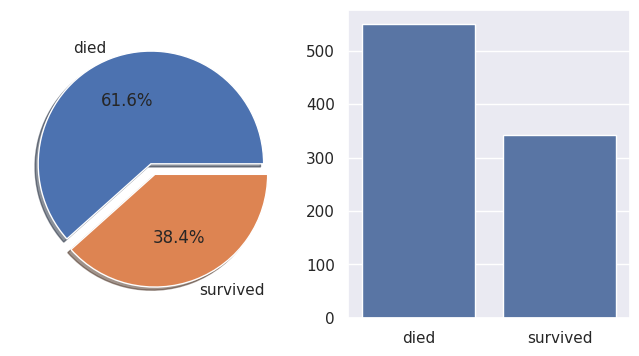

In [49]:
# ===================================================================
# Count of survived
# ===================================================================
f,ax=plt.subplots(1,2,figsize=(8,4)) #하나의 행과 두 개의 열로 구성된 서브플롯을 생성 (figsize 인수는 서브플롯의 크기를 설정함)
#파이 차트 생성
train_data['Survived'].replace({0:"died",1:"survived"}).value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True) #explode=[0, 0.1]는 'survived' 부분을 약간 띄워서 강조, autopct='%1.1f%%'는 각 파이 조각에 백분율을 표시,  ax=ax[0]는 첫 번째 서브플롯에 파이 차트를 그리도록 지정,  shadow=True는 파이 차트에 그림자를 추가
ax[0].set_ylabel('')
#막대 그래프 생성
sns.countplot(x = train_data["Survived"].replace({0:"died",1:"survived"}) , ax = ax[1]) #x 인수에 생존 여부를 지정하여 x축에 생존자와 사망자의 수를 표시
#레이블 제거
ax[1].set_ylabel('') #ax[0].set_ylabel('')와 ax[1].set_ylabel('')를 사용하여 y축 레이블을 제거
ax[1].set_xlabel('') #ax[1].set_xlabel('')를 사용하여 x축 레이블을 제거
plt.show()

#파이 차트 의미 : 생존 여부에 따른 승객 수의 비율로, died(사망) 비율은 전체 승객 중 61.6%고 나머지 38.4%가 살아남은 것임을 알 수 있음.
#막대그래프 의미 : 생존 여부에 따른 승객 수로, 이전에 승객 중 오직 338명(38%)만이 생존했다는 것을 확인

설명:
이 코드 블록은 Survived 열의 생존자 수와 사망자 수를 시각화합니다. 이를 위해 파이 차트와 막대 그래프를 나란히 표시합니다.


**코드 리뷰:**

주석 및 구분선:



서브플롯 생성:


f, ax = plt.subplots(1, 2, figsize=(8, 4))를 사용하여 하나의 행과 두 개의 열로 구성된 서브플롯을 생성합니다. figsize 인수는 서브플롯의 크기를 설정합니다.

파이 차트 생성:


train_data['Survived'].replace({0: "died", 1: "survived"}).value_counts().plot.pie(...)를 사용하여 파이 차트를 생성합니다.

explode=[0, 0.1]는 'survived' 부분을 약간 띄워서 강조합니다.
autopct='%1.1f%%'는 각 파이 조각에 백분율을 표시합니다.
ax=ax[0]는 첫 번째 서브플롯에 파이 차트를 그리도록 지정합니다.
shadow=True는 파이 차트에 그림자를 추가합니다.

막대 그래프 생성:

sns.countplot(x=train_data["Survived"].replace({0: "died", 1: "survived"}), ax=ax[1])를 사용하여 막대 그래프를 생성합니다.
x 인수에 생존 여부를 지정하여 x축에 생존자와 사망자의 수를 표시합니다.
ax=ax[1]는 두 번째 서브플롯에 막대 그래프를 그리도록 지정합니다.

레이블 제거:

ax[0].set_ylabel('')와 ax[1].set_ylabel('')를 사용하여 y축 레이블을 제거합니다.
ax[1].set_xlabel('')를 사용하여 x축 레이블을 제거합니다.

그래프 표시:

plt.show()를 사용하여 생성된 그래프를 화면에 표시합니다.



*   그래프에 대한 분석

이전에 승객 중 오직 338명(38%)만이 생존했다는 것을 확인했습니다. 데이터를 더 깊이 탐색하여 생존한 승객의 범주와 생존하지 못한 승객의 범주를 더 잘 이해할 필요가 있음.

**그래프 해석:**

파이 차트:

그래프 설명:

-파이 차트 의미 :  생존 여부에 따른 승객 수의 비율을 나타냄

-died(사망): 전체 승객 중 61.6%가 사망했습니다.

-survived(생존): 전체 승객 중 38.4%가 생존했습니다.

해석:

대부분의 승객이 사망했으며, 생존자는 약 38.4%입니다.
-> 이는 Titanic 데이터셋에서 생존자가 적다는 것을 시각적으로 보여줍니다.
막대 그래프:
그래프 설명:

막대 그래프는 생존 여부에 따른 승객 수를 나타냅니다.
died(사망): 약 500명의 승객이 사망했습니다.
survived(생존): 약 340명의 승객이 생존했습니다.
해석:

-그래프에서 사망한 승객이 생존한 승객보다 훨씬 많다는 것을 명확히 보여줍니다.

-사망자가 생존자보다 거의 두 배가량 많다는 것을 알 수 있습니다.

**결론:**

**전체적으로 Titanic 데이터셋에서 사망률이 생존율보다 훨씬 높음.**

생존 여부를 더 깊이 분석하기 위해, 승객의 다른 특성(예: 성별, 나이, 객실 등급 등)과의 관계를 탐구해야 함.

-> 추가 분석을 통해 특정 그룹이 생존할 가능성이 높거나 낮은 이유를 더 잘 이해할 수 있음.



Discovering the features correlation with Survived:

In [50]:
# Helper functions: 이 코드는 생존 여부와 다양한 특성 간의 관계를 시각화하고 요약하는 데 도움이 되는 세 개의 헬퍼 함수 (survived_bar_plot, survived_table, survived_hist_plot)를 정의함.
def survived_bar_plot(feature): #특정 특성과 생존 여부 간의 관계를 바 차트로 시각화함
    plt.figure(figsize = (6,4)) #새로운 그림을 생성하고 크기를 설정
    sns.barplot(data = train_data , x = feature , y = "Survived").set_title(f"{feature} Vs Survived")
    plt.show()
def survived_table(feature): #특정 특성과 생존 여부 간의 평균 생존율을 요약한 테이블을 생성함
    return train_data[[feature, "Survived"]].groupby([feature], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(low=0.75,high=1)
def survived_hist_plot(feature):
    plt.figure(figsize = (6,4)) #새로운 그림을 생성하고 크기를 설정
    sns.histplot(data = train_data , x = feature , hue = "Survived",binwidth=5,palette = sns.color_palette(["yellow" , "green"]) ,multiple = "stack" ).set_title(f"{feature} Vs Survived")
    plt.show()



*   Helper Functions : 이 코드는 생존 여부와 다양한 특성 간의 관계를 시각화하고 요약하는 데 도움이 되는 세 개의 헬퍼 함수(survived_bar_plot, survived_table, survived_hist_plot)를 정의함.

1. survived_bar_plot 함수:  

def survived_bar_plot(feature):
    plt.figure(figsize=(6,4))
    sns.barplot(data=train_data, x=feature, y="Survived").set_title(f"{feature} Vs Survived")
    plt.show()

-설명: 이 함수는 특정 특성과 생존 여부 간의 관계를 바 차트로 시각화합니다.

-매개변수: feature는 생존 여부와 비교할 특성입니다.

-세부 사항:

plt.figure(figsize=(6,4)): 새로운 그림을 생성하고 크기를 설정합니다.

sns.barplot(data=train_data, x=feature, y="Survived"): 지정된 특성과 생존 여부 간의 바 차트를 생성합니다.

.set_title(f"{feature} Vs Survived"): 그래프의 제목을 설정합니다.

plt.show(): 그래프를 표시합니다.


2. survived_table 함수:
def survived_table(feature):
    return train_data[[feature, "Survived"]].groupby([feature], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(low=0.75, high=1)

-설명: 이 함수는 특정 특성과 생존 여부 간의 평균 생존율을 요약한 테이블을 생성합니다.

-매개변수: feature는 생존 여부와 비교할 특성입니다.

-세부 사항:


train_data[[feature, "Survived"]]: 지정된 특성과 생존 여부 열을 선택합니다.

'.groupby([feature], as_index=False).mean(): 특성별로 그룹화하여 평균 생존율을 계산합니다.

'.sort_values(by='Survived', ascending=False): 생존율을 기준으로 내림차순 정렬합니다.
'.style.background_gradient(low=0.75, high=1): 테이블의 배경색을 그라디언트로 설정하여 시각적으로 강조합니다.


3. survived_hist_plot 함수:
def survived_hist_plot(feature):
    plt.figure(figsize=(6,4))
    sns.histplot(data=train_data, x=feature, hue="Survived", binwidth=5, palette=sns.color_palette(["yellow", "green"]), multiple="stack").set_title(f"{feature} Vs Survived")
    plt.show()

-설명: 이 함수는 특정 특성과 생존 여부 간의 관계를 히스토그램으로 시각화합니다.

-매개변수: feature는 생존 여부와 비교할 특성입니다.

-세부 사항:

'plt.figure(figsize=(6,4)): 새로운 그림을 생성하고 크기를 설정합니다.

'sns.histplot(data=train_data, x=feature, hue="Survived", binwidth=5, palette=sns.color_palette(["yellow", "green"]), multiple="stack"): 지정된 특성과 생존 여부 간의 히스토그램을 생성합니다.

'hue="Survived": 생존 여부에 따라 색상을 구분합니다.

'binwidth=5: 히스토그램의 빈 너비를 설정합니다.

'palette=sns.color_palette(["yellow", "green"]): 막대의 색상을 설정합니다.

'multiple="stack": 히스토그램을 누적형으로 표시합니다.

'.set_title(f"{feature} Vs Survived"): 그래프의 제목을 설정합니다.

'plt.show(): 그래프를 표시합니다.

----------------------------------------------------------------------------


**요약:**

-세 개의 함수 모두 feature와 Survived 간의 관계를 다양한 방식으로 시각화하고 요약합니다.

-이 함수들은 데이터 탐색 및 시각화 단계를 효율적으로 수행하는 데 유용합니다.

-survived_bar_plot 함수는 바 차트를 사용하여 비교하고, survived_table 함수는 요약 테이블을 제공하며, survived_hist_plot 함수는 히스토그램을 사용하여 분포를 시각화합니다.

**Sex Vs Survived:**

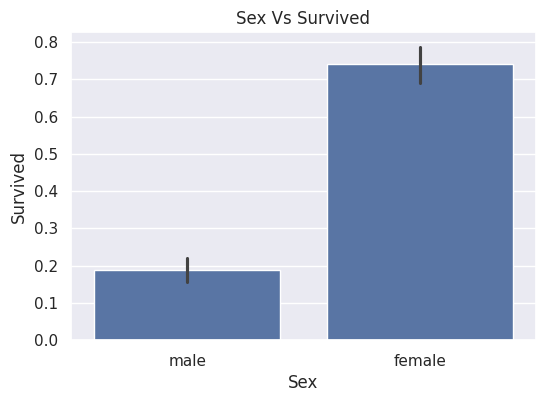

In [51]:
survived_bar_plot('Sex')

In [52]:
survived_table("Sex")

,Sex,Survived
0,female,0.742038
1,male,0.188908


**survived_bar_plot('Sex')와 survived_table('Sex')를 사용하는 이유**

1. 성별과 생존 여부 간의 관계를 시각화 하기 위해

survived_bar_plot('Sex'):

-함수의 특성 : 이 함수는 성별(Sex)과 생존 여부(Survived) 간의 관계를 바 차트로 시각화합니다.

-성별에 따른 생존율을 비교하여, 남성과 여성 중 어느 성별이 더 많이 생존했는지 시각적으로 확인할 수 있습니다.

-바 차트는 각** 성별의 평균 생존율을 막대의 높이로 나타내므로, 성별에 따른 생존율 차이를 쉽게 파악**할 수 있습니다.

2. 성별과 생존 여부 간의 평균 생존율을 요약한 테이블을 생성하기 위해

survived_table('Sex'):

-함수의 특성 : 이 함수는 성별(Sex)에 따른 평균 생존율을 계산하고, 이를 요약한 테이블을 생성합니다.

-테이블은 각 성별의 평균 생존율을 정량적으로 보여주어, 성별에 따른 생존율의 차이를 명확하게 파악할 수 있게 합니다.

-테이블을 통해 **남성과 여성의 평균 생존율을 비교하여, 생존율에 유의미한 차이가 있는지 분석**할 수 있습니다.

--------------------------------------------------------------------------------

**Insight 도출 :**



*  Titanic 데이터셋의 경우, 성별이 생존 여부에 중요한 영향을 미칠 수 있는 요인 중 하나임.
*   남성과 여성의 생존율을 비교함으로써, 특정 성별이 생존할 가능성이 더 높았는지 확인할 수 있으며 여기서는 **여성의 생존율이 74%로 더 높음을 확인.**



**Pclass Vs Survived:**

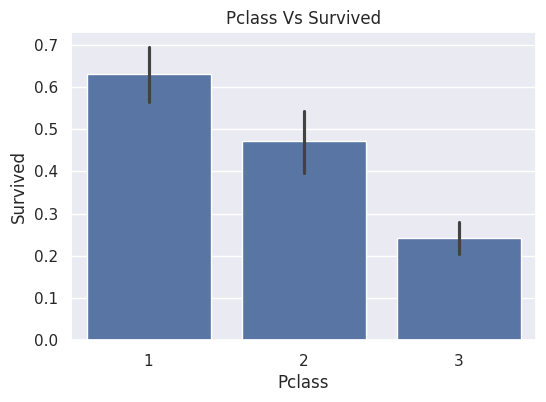

In [53]:
survived_bar_plot("Pclass")

In [54]:
survived_table("Pclass")

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


1등급 승객이 2등급 승객보다, 2등급 승객이 3등급 승객보다 생존할 가능성이 더 높습니다.

**Embarked:**

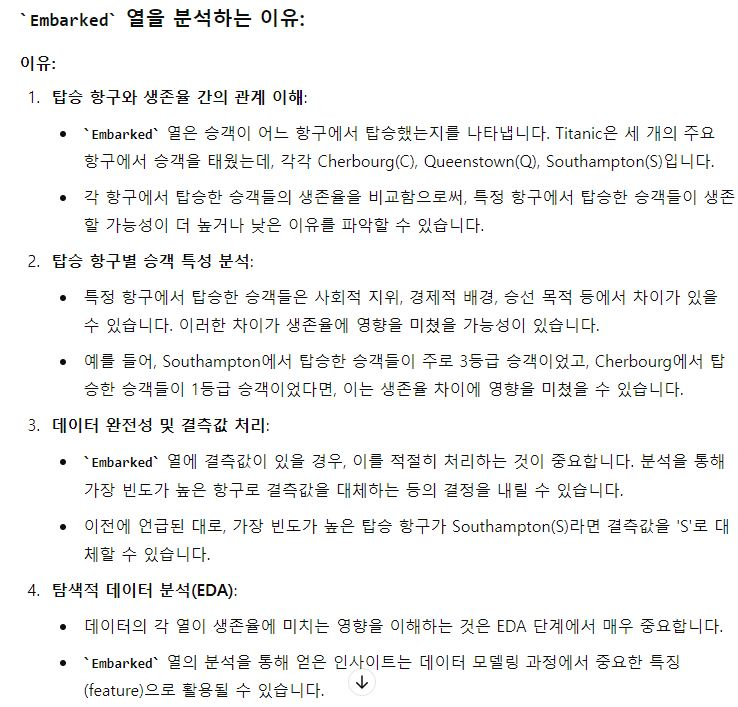

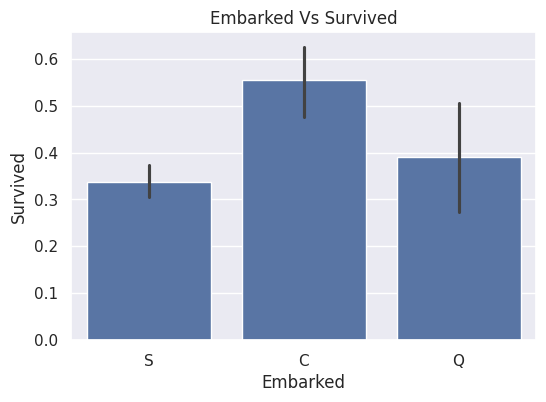

In [55]:
survived_bar_plot("Embarked") #Embarked 열을 분석하는 것은 승객들의 생존율에 영향을 미칠 수 있는 중요한 요인을 이해하고, 데이터의 특성을 더 잘 파악하며, 결측값을 적절히 처리하고, 모델링 과정에서 중요한 특징을 선택하는 데 도움이 됩니다. 이러한 분석을 통해 데이터 분석 및 모델링의 정확성과 효율성을 높일 수 있습니다.


In [56]:
survived_table("Embarked") #Titanic은 세 개의 주요 항구에서 승객을 태웠는데, 각각 Cherbourg(C), Queenstown(Q), Southampton(S)입니다.

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


**표 해석 **

C 항구에서 탑승한 승객들이 생존할 가능성이 가장 높고,
그 다음은 Q 항구,
그 다음은 S 항구입니다.

(이 이유는 간접적일 수 있습니다. 대부분의 1등급 승객들이 C 항구를 사용했을 것이라고 생각합니다.)

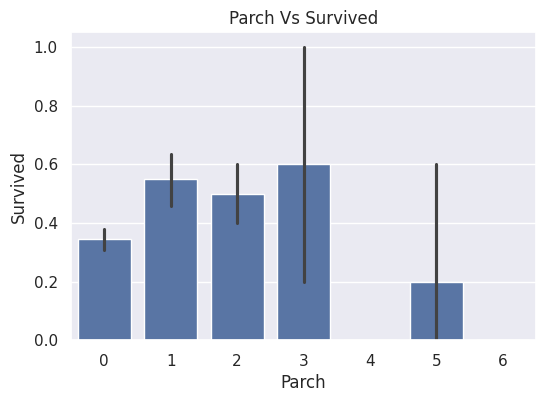

In [57]:
survived_bar_plot("Parch")

#Parch는 Titanic 데이터셋에서 승객과 함께 탑승한 부모 또는 자녀의 수를 나타내는 열로서, 가족 단위로 탑승한 승객들의 생존율을 분석할 수 있음.

#Parch: 탑승한 부모 또는 자녀 수 (Parents/Children)
#survived_bar_plot("Parch") 함수는 Parch 값과 생존율 간의 관계를 바 차트로 시각화한 것.

**그래프 설명:**

-이 그래프는 Parch 값에 따른 생존율(Survived)을 나타내는 바 차트입니다.

x축은 Parch 값(함께 탑승한 부모 또는 자녀의 수)을 나타내고, y축은 평균 생존율을 나타냅니다.

각 막대는 해당 Parch 값의 평균 생존율을 시각적으로 보여줍니다.

**그래프 해석:**

Parch 값이 0인 경우:
부모나 자녀 없이 혼자 탑승한 승객의 평균 생존율은 약 30%입니다.

Parch 값이 1인 경우:
부모나 자녀 중 한 명과 함께 탑승한 승객의 평균 생존율은 약 55%입니다.

Parch 값이 2인 경우:
부모나 자녀 중 두 명과 함께 탑승한 승객의 평균 생존율은 약 50%입니다.

Parch 값이 3인 경우:
부모나 자녀 중 세 명과 함께 탑승한 승객의 평균 생존율은 약 60%입니다.

Parch 값이 4 이상인 경우:
부모나 자녀 중 네 명 이상과 함께 탑승한 승객의 평균 생존율은 약 20% 미만입니다.



*   Parch 값이 1 또는 2인 승객들이 가장 높은 생존율을 보이고 있습니다.
*   Parch 값이 0이거나 4 이상인 승객들의 생존율은 상대적으로 낮으며, 대가족일수록 탈출이 어려웠을 수 있음.



In [58]:
survived_table("Parch")

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Parch 특성은 일부 값들에 대해 상관관계가 없음.

-> 더 유용한 특성을 도출하기 위해 이를 활용할 수 있을 것.

**SibSp:**

SibSp의 정의:

**SibSp: 함께 탑승한 형제자매(Siblings) 또는 배우자(Spouse)의 수를 나타내는 열.**

SibSp를 분석하는 이유:

생존율에 미치는 영향 분석:

SibSp 열을 분석함으로써 형제자매 또는 배우자와 함께 탑승한 승객들이 혼자 탑승한 승객들보다 생존율이 더 높은지 낮은지 파악할 수 있습니다.

함께 여행하는 가족 구성원이 있는 경우, 서로 도움을 주고받아 생존 가능성이 높아질 수 있습니다.


탐색적 데이터 분석(EDA):

SibSp 열을 분석하는 것은 EDA 단계에서 중요한 부분입니다. 이는 데이터의 특성과 분포를 이해하고, 각 특성이 생존율에 어떤 영향을 미치는지 파악하는 데 도움이 됩니다.

예를 들어, 특정 SibSp 값에서 생존율이 높거나 낮은 패턴을 발견하면, 해당 특성이 중요한 예측 변수일 수 있음을 시사합니다.

In [59]:
survived_table("SibSp")

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000




*   설명

이 코드는 survived_table 함수를 호출하여 SibSp 열과 Survived 열 간의 평균 생존율을 요약한 테이블을 생성하고 시각화합니다. 이 함수는 특정 특성과 생존율 간의 관계를 이해하는 데 유용합니다.


*   **survived_table 함수의 작동 방식:**

1.특정 특성과 생존율 간의 관계를 요약:

- train_data[[feature, "Survived"]]:

 - 'train_data 데이터프레임에서 feature 열(SibSp 열)과 Survived 열을 선택합니다.
- '.groupby([feature], as_index=False).mean():

 - 'feature(여기서는 SibSp) 값을 기준으로 그룹화한 후, 각 그룹의 평균 생존율을 계산합니다.
- .sort_values(by='Survived', ascending=False):

 - 계산된 평균 생존율을 기준으로 내림차순으로 정렬합니다.

- '.style.background_gradient(low=0.75, high=1):

 - 결과 테이블에 색상 그라디언트를 적용하여 시각적으로 강조합니다.



**출력된 테이블 해석:**

SibSp 값이 0인 경우:

- 형제자매나 배우자 없이 혼자 탑승한 승객의 생존율은 약 34.5%입니다.

SibSp 값이 1인 경우:

- 형제자매나 배우자 중 한 명과 함께 탑승한 승객의 생존율은 약 53.6%입니다.

SibSp 값이 2인 경우:

- 형제자매나 배우자 중 두 명과 함께 탑승한 승객의 생존율은 약 46.4%입니다.

SibSp 값이 3인 경우:

-형제자매나 배우자 중 세 명과 함께 탑승한 승객의 생존율은 약 25.0%입니다.

SibSp 값이 4인 경우:

- 형제자매나 배우자 중 네 명과 함께 탑승한 승객의 생존율은 약 16.7%입니다.

SibSp 값이 5 또는 8인 경우:

- 형제자매나 배우자 중 다섯 명 또는 여덟 명과 함께 탑승한 승객의 생존율은 0%입니다.

**코드 리뷰 요약:**

-** survived_table("SibSp") 함수 호출을 통해 SibSp 값과 생존율 간의 관계를 쉽게 파악할 수 있습니다.**

- **테이블을 통해 SibSp 값이 1 또는 2인 경우 생존율이 가장 높음을 알 수 있으며, 형제자매나 배우자가 너무 많을 경우(5 또는 8명) 생존율이 0%로 매우 낮음을 알 수 있습니다.**

- 이 분석 결과를 통해 형제자매 또는 배우자와 함께 탑승한 승객들의 생존율을 이해하고, 이를 모델링 과정에서 중요한 특성으로 활용할 수 있습니다.






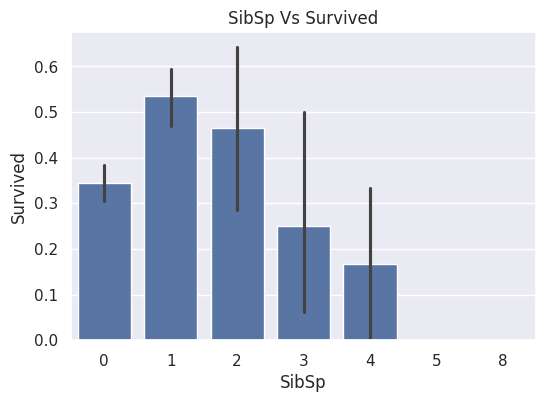

In [60]:
survived_bar_plot("SibSp")

**그래프 설명:**

이 그래프는 SibSp 값과 생존율(Survived) 간의 관계를 나타내는 바 차트입니다. **SibSp 값은 함께 탑승한 형제자매 또는 배우자의 수를 나타내며, 각 SibSp 값에 따른 평균 생존율을 시각화합니다.**

-> 그래프 해석및 값은 상단과 같음.

-일부 SibSp 값(예: 5, 8)에서는 생존율이 0%로 나타나며,
특정 값에 대해서는 생존율과 상관관계가 낮음을 알 수 있습니다.

**Age:**

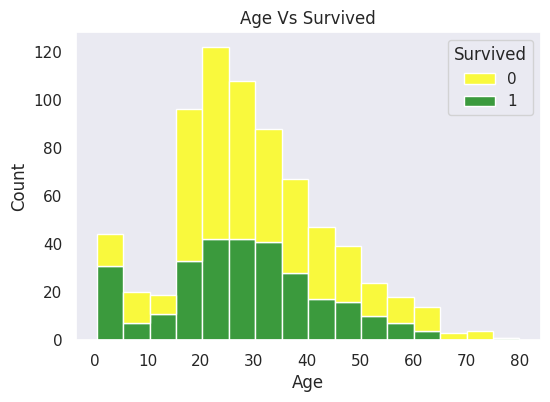

In [61]:
sns.set_style("dark")
survived_hist_plot("Age")

**그래프 설명:**

그래프는 나이(Age)와 생존 여부(Survived) 간의 관계를 나타내는 히스토그램입니다.

x축은 나이를, y축은 승객 수를 나타냅니다.

노란색은 사망자, 초록색은 생존자를 나타냅니다.

**그래프 해석:**

유아(5세 이하) 및 어린이(10세에서 15세 사이):


유아와 어린이의 생존율이 높습니다. 많은 어린이들이 생존한 것으로 보입니다.

고령 승객(75세 이상):


75세 이상의 승객들도 생존한 사례가 있습니다.

대부분의 승객 연령대(15세에서 40세 사이):

이 연령대에 속한 승객이 가장 많습니다. 이 연령대의 승객들은 생존자와 사망자가 모두 많습니다.

-> 데이터 분석 결과와 통찰:


유아 및 어린이: 유아(5세 이하)와 어린이(10세에서 15세 사이)는 생존 가능성이 높습니다.

이는 비상 상황에서 어린이들이 우선적으로 구조될 가능성이 높다는 것을 파악할 수 있음.


고령 승객: 75세 이상의 고령 승객들도 일부 생존한 사례가 있습니다.

중간 연령대: 대부분의 승객이 15세에서 40세 사이에 속하며, 이 연령대는 생존자와 사망자가 모두 많습니다.

Discovering the correlation between the features :

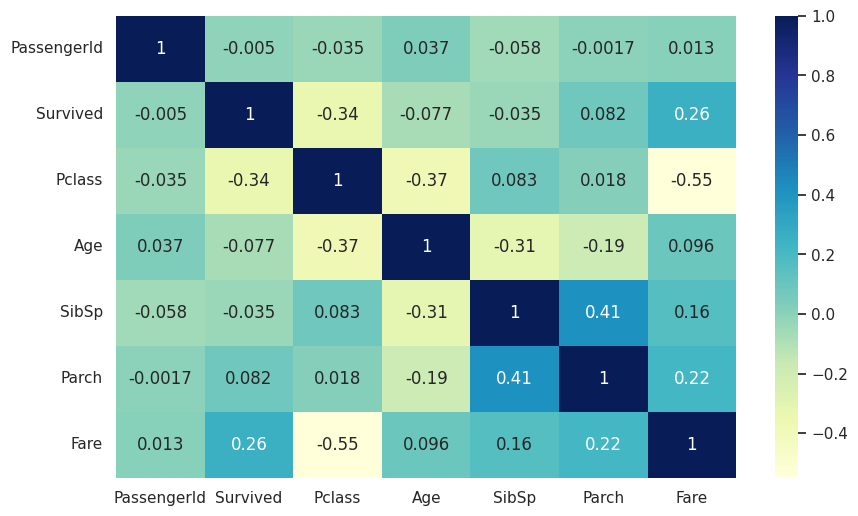

In [62]:
# 수치형 데이터만 포함된 데이터프레임 생성
numeric_data = train_data.select_dtypes(include=[np.number])

# 상관 행렬 계산 및 히트맵 시각화
sns.set(rc={'figure.figsize': (10, 6)})
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2g', cmap='YlGnBu')
plt.show()

**Code 설명**
- select_dtypes(include=[np.number]) 메서드를 사용하여 train_data에서 수치형 데이터만 선택함. 이를 통해 상관 행렬 계산에 사용되는 데이터프레임을 생성할 수 있음.

- sns.set(rc={'figure.figsize': (10, 6)})를 사용하여 히트맵의 크기를 설정함.

- sns.heatmap(numeric_data.corr(), annot=True, fmt='.2g', cmap='YlGnBu')를 사용하여 상관 행렬을 히트맵으로 시각화함.

- annot=True: 각 셀에 상관 계수 값을 표시함.

- fmt='.2g': 상관 계수 값을 소수점 둘째 자리까지 표시함.

- cmap='YlGnBu': 히트맵의 색상 맵을 설정함.

**히트맵 설명**

상관 관계 분석 결과:

PassengerId:

PassengerId는 어떠한 특성과도 상관관계가 없습니다.
이는 승객의 고유 식별자이기 때문에, 실제 데이터 분석에서 의미 있는 변수가 아닙니다.

Pclass:

Pclass는 Age와 Fare와 강한 음의 상관관계를 가집니다.
Pclass와 Age: 객실 등급이 높을수록(숫자가 작을수록) 승객의 나이가 젊습니다.

Pclass와 Fare: 객실 등급이 높을수록 운임(Fare)이 높습니다.

Age:

**Age는 Parch와 SibSp와 음의 상관관계를 가집니다.**
Age와 Parch: 나이가 많을수록 부모 또는 자녀의 수가 적습니다.
Age와 SibSp: 나이가 많을수록 형제자매 또는 배우자의 수가 적습니다.

**Pclass - Age - Survived:**

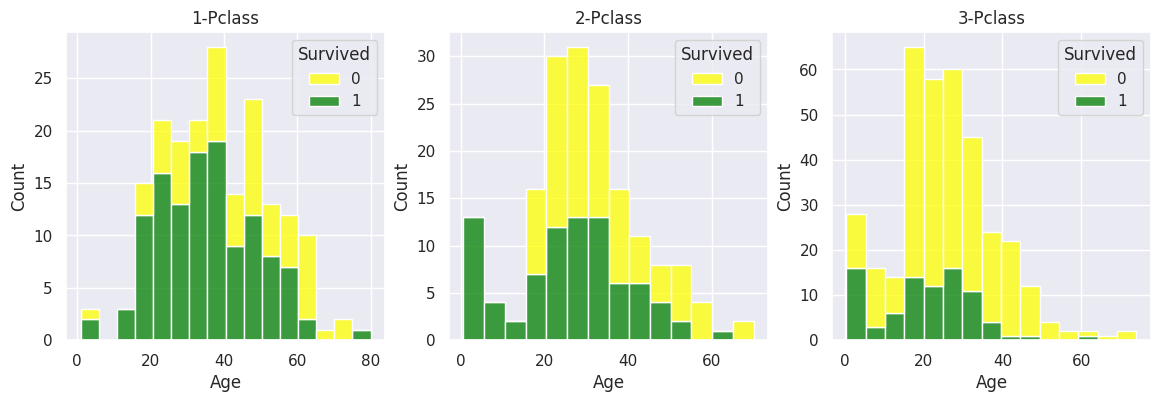

In [63]:
plot , ax = plt.subplots(1 , 3 , figsize=(14,4)) #서브플롯 생성

sns.histplot(data = train_data.loc[train_data["Pclass"]==1] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[0],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("1-Pclass") # 1등급 객실 히스토그램
sns.histplot(data = train_data.loc[train_data["Pclass"]==2] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[1],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("2-Pclass")
sns.histplot(data = train_data.loc[train_data["Pclass"]==3] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[2],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("3-Pclass")
plt.show()



*   설명 : 이 코드는 Pclass(객실 등급)별로 나이(Age)와 생존 여부(Survived) 간의 관계를 시각화하는 히스토그램을 생성하며, 각 히스토그램은 누적형(stack plot) 히스토그램으로, 생존자(초록색)와 사망자(노란색)의 분포를 보여줍니다.
*   코드 설명

- 1.서브플롯 생성

plot, ax = plt.subplots(1, 3, figsize=(14,4))

: plt.subplots(1, 3, figsize=(14,4))는 1행 3열의 서브플롯을 생성합니다. 각 서브플롯의 크기는 (14, 4)로 설정됩니다.

-> 이때, 'ax' 부분은 서브플롯의 축을 나타내는 배열임.

- 2.1등급 객실 승객 히스토그램 :

sns.histplot(data=train_data.loc[train_data["Pclass"]==1], x="Age", hue="Survived", binwidth=5, ax=ax[0], palette=sns.color_palette(["yellow", "green"]), multiple="stack").set_title("1-Pclass")

- 'train_data에서 Pclass가 1인 데이터를 선택하여 히스토그램을 생성합니다.
- x축은 Age를, 색상은 Survived 여부를 나타냅니다.
- binwidth=5는 히스토그램의 빈 너비를 5로 설정합니다.
- ax=ax[0]는 첫 번째 서브플롯에 그래프를 그리도록 지정합니다.
- palette=sns.color_palette(["yellow", "green"])는 색상 팔레트를 설정합니다.
- multiple="stack"는 누적형 히스토그램을 생성합니다.
-.set_title("1-Pclass")는 그래프 제목을 설정합니다.


3. 2등급 객실 승객 히스토그램:

sns.histplot(data=train_data.loc[train_data["Pclass"]==2], x="Age", hue="Survived", binwidth=5, ax=ax[1], palette=sns.color_palette(["yellow", "green"]), multiple="stack").set_title("2-Pclass")

- 'train_data에서 Pclass가 2인 데이터를 선택하여 히스토그램을 생성합니다.
- 나머지 매개변수는 1등급 객실 히스토그램과 동일합니다.
- ax=ax[1]는 두 번째 서브플롯에 그래프를 그리도록 지정합니다.

4. 그래프 표시

plt.show()

- 생성된 모든 서브플롯을 화면에 표시합니다.


** 결론 **

1등급 객실 승객 (1-Pclass):

1등급 객실 승객의 경우, 대부분이 성인(20-40세)입니다.

어린이와 성인의 생존율이 높으며, 특히 30대 성인의 생존율이 높습니다.

2등급 객실 승객 (2-Pclass):

2등급 객실 승객의 경우, 주로 20-50세 사이의 승객이 많습니다.

생존율은 전반적으로 1등급보다 낮지만, 20대 초반과 40대 초반 승객의 생존율이 상대적으로 높습니다.

3등급 객실 승객 (3-Pclass):

3등급 객실 승객의 경우, 다양한 연령대가 분포되어 있으며, 주로 어린이와 젊은 성인(20-30세) 승객이 많습니다.

어린이의 생존율이 높으며, 20대 성인의 생존율이 상대적으로 낮습니다.




**Sex - Age - Survived:**

이 코드는 성별(Sex)에 따라 나이(Age)와 생존 여부(Survived) 간의 관계를 시각화하는 히스토그램을 생성함.

각 히스토그램은 누적형(stack plot) 히스토그램으로, 생존자(초록색)와 사망자(노란색)의 분포를 보여줌.

Text(0.5, 1.0, 'Females')

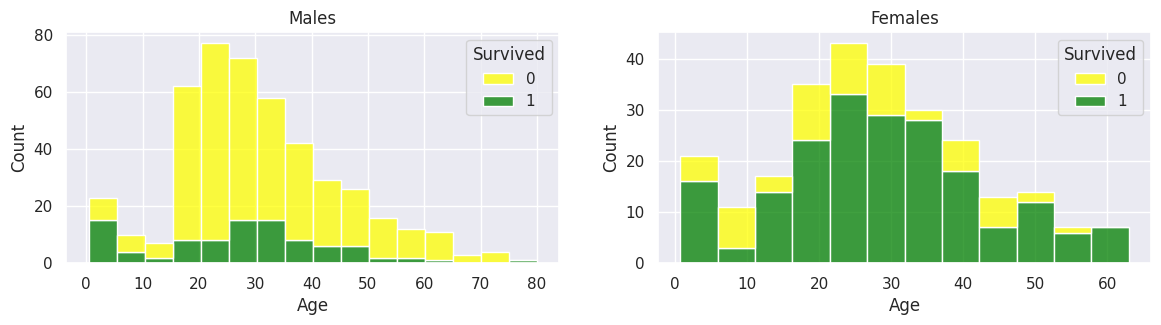

In [64]:
plot , ax = plt.subplots(1 , 2 , figsize=(14,3)) #서브플롯생성
sns.histplot(data = train_data.loc[train_data["Sex"]=="male"] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[0],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("Males") #남성 승객 히스토그램
sns.histplot(data = train_data.loc[train_data["Sex"]=="female"] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[1],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("Females")

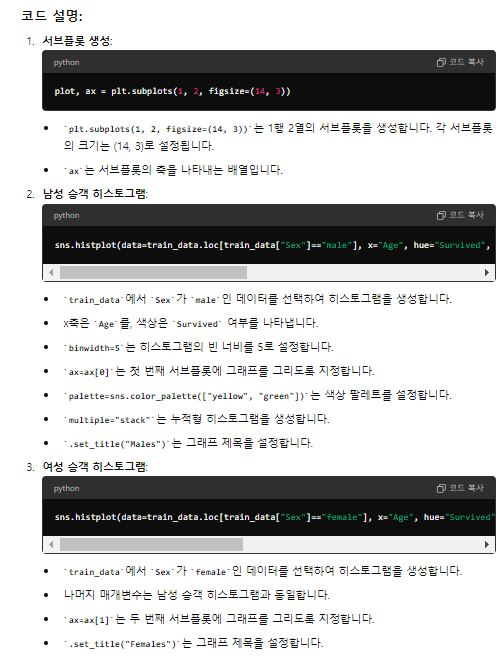

**그래프 해석**

**-남성 승객 (Males):**

남성 승객의 경우, 주로 20-40세 사이의 승객이 많음.

20대 남성의 사망자 수가 가장 많으며,
30대 초반의 생존자 수가 상대적으로 많음.

전반적으로 남성 승객의 생존율이 낮은 편임.

**-여성 승객 (Females):**

여성 승객의 경우, 주로 20-40세 사이의 승객이 많음.

20대와 30대 여성의 생존자 수가 많으며,
특히 20대 후반에서 30대 초반의 생존율이 높음.

전반적으로 여성 승객의 생존율이 높은 편임.

# **(4) Wrangling The Data:**

**Drop unuseful features**

In [65]:
#PassengerId 열 삭제:
train_data.drop(columns = ["PassengerId"] , inplace = True) #train_data 데이터프레임에서 PassengerId 열 삭제, inplace=True로 설정하여 원본 데이터프레임에 바로 적용

#Ticket 및 Cabin 열 삭제 (combine 리스트에 있는 모든 데이터프레임(train_data와 test_data)에서 Ticket과 Cabin 열을 삭제)
for dataset in combine:
    dataset.drop(columns = ["Ticket" , "Cabin"] , inplace = True) #inplace=True로 설정하여 원본 데이터프레임에 바로 적용
#완료 메시지 출력:
print("Dropping features Done !!") #열 삭제 작업이 완료되었음을 알리는 메시지를 출력하기

Dropping features Done !!


**Converting Categorical Features to Numerical and Filling Missed Values:
(범주형 특성을 수치형으로 변환하고 결측값을 채우기)**


In [66]:
#Embarked
#결측값 채우기:
train_data.Embarked.fillna(train_data.Embarked.dropna().max(), inplace=True) #train_data 데이터프레임의 Embarked 열에서 결측값을 dropna().max() 값을 사용하여 채움.
#수치형으로 변환
for dataset in combine: #combine 리스트에 있는 모든 데이터프레임에서 Embarked 열의 결측값을 처리하고, 수치형 값으로 변환
    dataset['Embarked'] = dataset['Embarked'].dropna().map({'S':0,'C':1,'Q':2}).astype(int) #map을 사용하여 'S'를 0, 'C'를 1, 'Q'를 2로 변환

**목표**

Embarked 열의 결측값을 채우고, 범주형 값을 수치형 값으로 변환.

**문제원인:**

-결측값이 완전히 처리되지 않아서 astype(int) 변환 중에 에러가 발생합니다.

-dropna() 메서드를 사용하면 여전히 결측값이 남아 있을 수 있습니다.

* train_data 데이터프레임의 Embarked 열에서 결측값을 dropna().max() 값을 사용하여 채웁니다.

* dropna().max()는 Embarked 열에서 결측값을 제외하고 가장 큰 값을 찾습니다. 여기서 'S'가 됩니다.


* inplace=True로 설정하여 원본 데이터프레임에 바로 적용합니다.

**수치형으로 변환**
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].dropna().map({'S':0, 'C':1, 'Q':2}).astype(int)

- 'combine 리스트에 있는 모든 데이터프레임에서 Embarked 열의 결측값을 처리하고, 수치형 값으로 변환합니다.

- 'dropna()를 사용하여 결측값을 제외한 후, map({'S':0, 'C':1, 'Q':2})을 사용하여 범주형 값을 수치형 값으로 변환합니다.

- 'astype(int)를 사용하여 결과를 정수형으로 변환합니다.

In [67]:
#sex :
#수치형으로 변환
#'female'을 1로, 'male'을 0으로 변환하여 분석 및 모델링에 사용할 수 있도록 준비
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

-combine 리스트에 있는 모든 데이터프레임에서 Sex 열을 변환합니다.

-map({'female': 1, 'male': 0})를 사용하여 'female'을 1로, 'male'을 0으로 변환합니다.

-astype(int)를 사용하여 변환된 값을 정수형으로 변환합니다.

##상세 설명 ##


-map 메서드:

map 메서드를 사용하여 Sex 열의 값을 'female'은 1로, 'male'은 0으로 매핑합니다.

-예: 'female' → 1, 'male' → 0

astype(int) 메서드:


astype(int) 메서드를 사용하여 변환된 값을 정수형으로 변환합니다.

이는 데이터의 일관성을 유지하고, 분석 및 모델링 과정에서 수치형 데이터를 필요로 하는 경우에 유용함.

In [68]:
#Age :
#추정 나이 배열 초기화:
guess_ages = np.zeros((2,3)) #2x3 크기의 배열을 생성하여 성별과 객실 등급별로 나이의 중앙값을 저장

#성별과 객실 등급별 중앙값 계산 및 저장:

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5


#각 데이터셋에서 성별(Sex)과 객실 등급(Pclass)에 따라 나이(Age)의 중앙값을 계산함
#중앙값을 가장 가까운 0.5 단위로 반올림하여 guess_ages 배열에 저장함


  #결측값 채우기
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]
    #나이 열을 정수형으로 변환
    dataset['Age'] = dataset['Age'].astype(int)

 Age 열의 결측값을 성별(Sex)과 객실 등급(Pclass)에 따라 추정된 값으로 채우며,
 추정된 값은 각 그룹의 중앙값(median)을 사용하여 채워집니다.

**Fare :열의 결측값을 중앙값으로 채우고, 데이터프레임에서 결측값이 남아 있는지 확인**

In [69]:
test_data.Fare.fillna(test_data.Fare.dropna().median() , inplace= True) #test_data 데이터프레임의 Fare 열에서 결측값을 중앙값으로 채움, dropna().median()을 사용하여 Fare 열의 결측값을 제외한 중앙값을 계산, fillna(..., inplace=True)를 사용하여 중앙값으로 결측값을 채우고, 원본 데이터프레임에 바로 적용

Fare 열의 결측값을 중앙값으로 채우기:
- test_data 데이터프레임의 Fare 열에서 결측값을 중앙값으로 채웁니다.
- dropna().median()을 사용하여 Fare 열의 결측값을 제외한 중앙값을 계산합니다.
- fillna(..., inplace=True)를 사용하여 중앙값으로 결측값을 채우고, 원본 데이터프레임에 바로 적용합니다.

-> 결측값을 처리한 후, 각 데이터프레임의 결측값 개수를 확인하여 데이터가 제대로 전처리되었는지 검증 가능!

In [70]:
print(train_data.isnull().sum()) #train_data와 test_data 데이터프레임에서 각 열의 결측값 개수를 출력, isnull().sum()을 사용하여 각 열의 결측값 개수를 계산
print("-" * 50) #print("-" * 50)는 구분선을 출력하여 가독성을 높임
print(test_data.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
--------------------------------------------------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


**결측값 확인:**
- train_data와 test_data 데이터프레임에서 각 열의 결측값 개수를 출력합니다.
- isnull().sum()을 사용하여 각 열의 결측값 개수를 계산합니다.
- print("-" * 50)는 구분선을 출력하여 가독성을 높입니다.



---


- train_data와 test_data 데이터프레임의 결측값 개수를 보여줍니다. 각각의 데이터프레임에서 특정 열에 결측값이 있는지 확인할 수 있습니다.

- train_data 결측값:

- Age: 177개의 결측값이 존재
- 나머지 열들(Survived, Pclass, Name, Sex, SibSp, Parch, Fare, Embarked)은 결측값이 없습니다.

- test_data 결측값:

Age: 86개의 결측값이 존재합니다.
나머지 열들(PassengerId, Pclass, Name, Sex, SibSp, Parch, Fare, Embarked)은 결측값이 없습니다.

- 결론:
train_data와 test_data 모두 Age 열에 결측값이 많이 존재함.
Fare 열의 결측값은 처리되었으며, 다른 열들도 결측값이 없는 상태임.

In [71]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,0


# **Creating Bands:**
**Age Band:**

In [72]:
# Age 열을 5개의 구간으로 나누어 AgeBand를 생성하고, 각 나이 구간별 생존율을 계산합니다. 이 과정을 통해 나이와 생존 여부 간의 관계를 이해
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)



<ipython-input-72-028c5a73bfa2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


**코드 리뷰**

이 코드는 Age 열을 5개의 구간으로 나누어 AgeBand를 생성하고, 각 나이 구간별 생존율을 계산합니다.
이 과정을 통해 나이와 생존 여부 간의 관계를 이해할 수 있습니다.

-'AgeBand' 생성:

train_data['AgeBand'] = pd.cut(train_data['Age'], 5)

- pd.cut 함수는 Age 열을 5개의 구간으로 나누어 새로운 AgeBand 열을 생성합니다.
- 생성된 AgeBand 열은 나이 구간을 범주형 데이터로 나타냅니다.

-'AgeBand' 와 'Survived' 간의 관계 분석:

ageband_survival = train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


-AgeBand와 Survived 열을 선택하여 그룹화(groupby)합니다.

- 각 그룹의 평균 생존율을 계산합니다.
- AgeBand를 기준으로 오름차순 정렬합니다.

- 결과 출력 : 생성된 ageband_survival 데이터프레임을 출력하여 각 나이 구간별 생존율을 확인합니다.

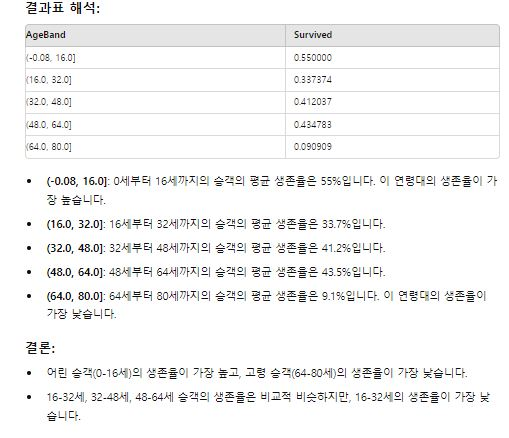

In [73]:
#Age열의 구간화 및 범주형 변환
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] #combine 리스트에 있는 모든 데이터프레임에서 Age 열을 구간화, 각 구간에 대해 조건을 설정하고, 해당 조건을 만족하는 Age 값을 새로운 범주형 값으로 변환함
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,0,"(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,1,"(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,0,"(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,0,"(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,0,"(32.0, 48.0]"


**코드 리뷰**
이 코드는 Age 열을 여러 구간으로 나누어 각각의 구간에 번호를 할당합니다.

이를 통해 Age 열을 범주형 변수로 변환하여 분석 및 모델링에 사용할 수 있도록 준비합니다.

**코드 설명**

-'Age' 열의 구간화 및 범주형 변환:

for dataset in combine:    
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4


combine 리스트에 있는 모든 데이터프레임에서 Age 열을 구간화합니다.

각 구간에 대해 조건을 설정하고, 해당 조건을 만족하는 Age 값을 새로운 범주형 값으로 변환합니다.

0: 16세 이하

1: 16세 초과 32세 이하

2: 32세 초과 48세 이하

3: 48세 초과 64세 이하

4: 64세 초과


2. 결과 출력 :

train_data.head()

변환된 train_data 데이터프레임의 상위 5개 행을 출력합니다.

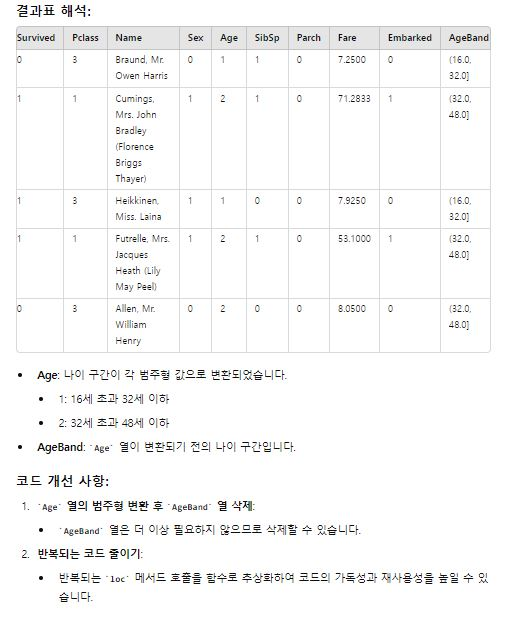

In [74]:
train_data.drop(['AgeBand'], axis=1 , inplace = True)

**Fare Band:**

이 코드는 Fare 열을 4개의 분위 구간으로 나누어 FareBand를 생성하고, 각 요금 구간별 생존율을 계산합니다.

이를 통해 요금과 생존 여부 간의 관계를 이해할 수 있습니다.

In [75]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4) #pd.qcut 함수는 Fare 열을 4개의 분위 구간으로 나누어 새로운 FareBand 열을 생성함
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=False) #FareBand와 Survived 열을 선택하여 그룹화(groupby)하고 각 그룹의 평균 생존율을 계산함, FareBand를 기준으로 오름차순 정렬.

<ipython-input-75-f89fb9ac0eec>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=False)


,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


1. FareBand 생성:

train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)


pd.qcut 함수는 Fare 열을 4개의 분위 구간으로 나누어 새로운 FareBand 열을 생성합니다.

생성된 FareBand 열은 요금 구간을 범주형 데이터로 나타냅니다.

2. FareBand와 Survived 간의 관계 분석:

fareband_survival = train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=False)

FareBand와 Survived 열을 선택하여 그룹화(groupby)합니다.

각 그룹의 평균 생존율을 계산합니다.

FareBand를 기준으로 오름차순 정렬합니다.

3. 결과 출력:

생성된 fareband_survival 데이터프레임을 출력하여 각 요금 구간별 생존율을 확인합니다.

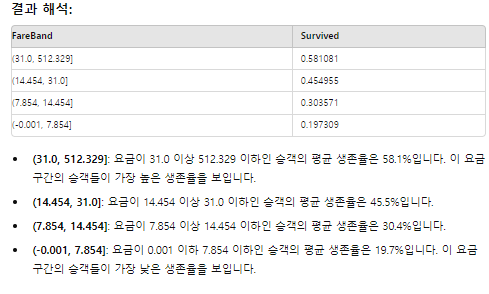


In [76]:
#FareBand 생성
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data.drop(['FareBand'], axis=1 , inplace = True)

이 코드는 Fare 열을 4개의 분위 구간으로 나누어 FareBand를 생성하고, 각 요금 구간별 생존율을 계산합니다.
이를 통해 요금과 생존 여부 간의 관계를 이해할 수 있습니다.

코드 설명:

1. FareBand 생성:

train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)

- pd.qcut 함수는 Fare 열을 4개의 분위 구간으로 나누어 새로운 FareBand 열을 생성합니다.
- 생성된 FareBand 열은 요금 구간을 범주형 데이터로 나타냅니다.

2. FareBand와 Survived 간의 관계 분석:

fareband_survival = train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=False)

- FareBand와 Survived 열을 선택하여 그룹화(groupby)합니다.
각 그룹의 평균 생존율을 계산합니다.
- FareBand를 기준으로 오름차순 정렬합니다.

3. 결과 출력:

- 생성된 fareband_survival 데이터프레임을 출력하여 각 요금 구간별 생존율을 확인합니다.

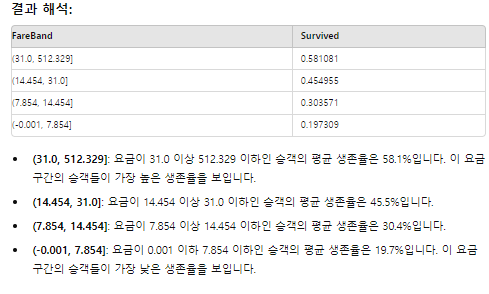

In [77]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,3,1
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,3,0
4,0,3,"Allen, Mr. William Henry",0,2,0,0,1,0


# **Data Engineering:**
**Family Size:**

In [78]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data.drop(['Parch', 'SibSp'], axis=1 , inplace = True)
test_data.drop(['Parch', 'SibSp'], axis=1 , inplace = True)

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


이 코드는 데이터 엔지니어링의 일환으로 가족 크기(FamilySize)를 생성하고, SibSp와 Parch 열을 삭제합니다.
또한, FamilySize와 생존율(Survived) 간의 관계를 분석합니다.

**코드 설명**

1. FamilySize 생성:

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

- combine 리스트에 있는 모든 데이터프레임에서 SibSp(형제자매/배우자 수)와 Parch(부모/자녀 수)를 합산하고 1을 더하여 FamilySize(가족 크기) 열을 생성합니다.
- 자신을 포함하기 위해 1을 더합니다.

2. 불필요한 열 삭제:

train_data.drop(['Parch', 'SibSp'], axis=1, inplace=True)
test_data.drop(['Parch', 'SibSp'], axis=1, inplace=True)

- train_data와 test_data 데이터프레임에서 Parch와 SibSp 열을 삭제합니다.
- axis=1은 열을 삭제함을 의미합니다.
- inplace=True는 원본 데이터프레임에 변경 사항을 바로 적용합니다.

3. FamilySize와 생존율 간의 관계 분석:

family_size_survival = train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


- FamilySize와 Survived 열을 선택하여 그룹화(groupby)합니다.
- 각 가족 크기별 평균 생존율을 계산합니다.
- Survived를 기준으로 내림차순 정렬합니다.

4. 결과 출력:

- 생성된 family_size_survival 데이터프레임을 출력하여 가족 크기별 생존율을 확인합니다.

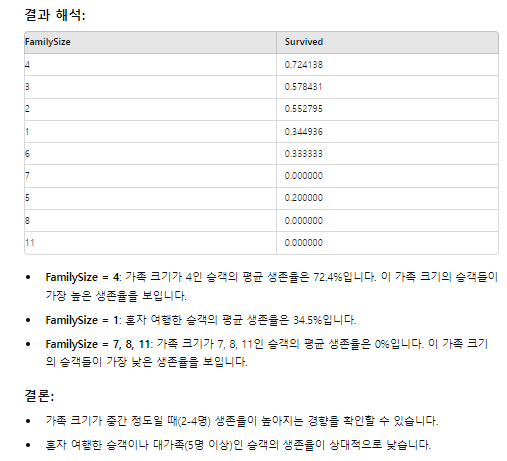

In [79]:
# Create new feature of family size
for dataset in combine:
    dataset['Single'] = dataset['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    dataset['SmallF'] = dataset['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
    dataset['MedF'] = dataset['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
    dataset['LargeF'] = dataset['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

train_data.drop(columns = ["FamilySize"] , inplace = True)
test_data.drop(columns = ["FamilySize"] , inplace = True)

**Name Title :**

In [80]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False) #combine 리스트에 있는 모든 데이터프레임에서 Name 열에서 타이틀(호칭)을 추출하여 새로운 Title 열에 저장 /([A-Za-z]+).: 공백 다음에 알파벳이 하나 이상 오고, 그 뒤에 마침표가 오는 패턴을 의미, expand=False는 시리즈로 반환하도록 설정

pd.crosstab(train_data['Title'], train_data['Sex']) #pd.crosstab 함수를 사용하여 train_data 데이터프레임에서 Title과 Sex 열 간의 교차표를 생성 , 남성(0)과 여성(1)의미함

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


이 코드는 승객의 이름에서 타이틀(호칭)을 추출하고, 타이틀과 성별 간의 교차표를 생성함.

-> 이를 통해 타이틀과 성별 간의 관계를 분석할 수 있음.

1. 타이틀(호칭) 추출:

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

- combine 리스트에 있는 모든 데이터프레임에서 Name 열에서 타이틀(호칭)을 추출하여 새로운 Title 열에 저장합니다.
- str.extract(' ([A-Za-z]+)\.')는 정규 표현식을 사용하여 이름에서 타이틀을 추출합니다.
- ([A-Za-z]+)\.: 공백 다음에 알파벳이 하나 이상 오고, 그 뒤에 마침표가 오는 패턴을 의미합니다.
- expand=False는 시리즈로 반환하도록 설정합니다.

2. 타이틀과 성별 간의 교차표 생성:

pd.crosstab(train_data['Title'], train_data['Sex'])

- pd.crosstab 함수를 사용하여 train_data 데이터프레임에서 Title과 Sex 열 간의 교차표를 생성합니다.
- 이 교차표는 각 타이틀에 대해 남성(0)과 여성(1)의 수를 보여줍니다.

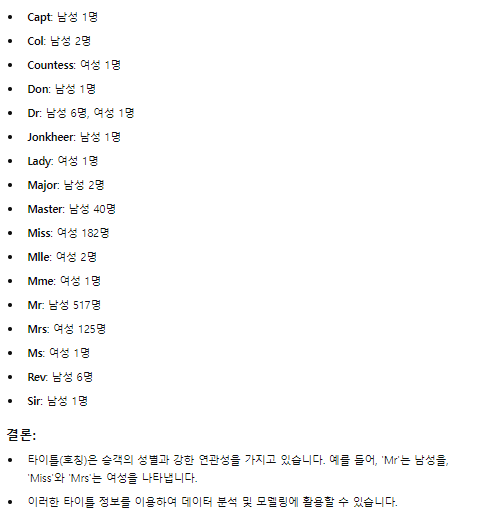

In [81]:
#타이틀 통합 및 대체
for dataset in combine: #combine 리스트에 있는 모든 데이터프레임에서 Title 열의 값을 통합
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare') #드문 타이틀(호칭)은 'Rare'로 통합
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss') #'Mlle'와 'Ms'는 'Miss'로 통합
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss') #'Mme'는 'Mrs'로 통합
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() #Title과 Survived 열을 선택하여 그룹화(groupby)하고, 각 타이틀별 평균 생존율을 계산함

#표내용 : Miss와 Mrs 타이틀을 가진 승객의 생존율이 상대적으로 높으며, Mr 타이틀을 가진 승객의 생존율이 낮음.
#         Rare 타이틀을 가진 승객의 생존율은 중간 정도임.

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


이 코드는 드문 타이틀을 'Rare'로 통합하고, 다른 유사한 타이틀을 일반적인 타이틀로 대체하여 타이틀과 생존율 간의 관계를 분석하는 것.

-> 타이틀을 정규화하고 분석 및 모델링의 정확성을 높일 수 있음!

**코드 설명**

1. 타이틀 통합 및 대체:

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['

- combine 리스트에 있는 모든 데이터프레임에서 Title 열의 값을 통합합니다.
- 드문 타이틀(호칭)은 'Rare'로 통합합니다.
- 'Mlle'와 'Ms'는 'Miss'로 통합합니다.
- 'Mme'는 'Mrs'로 통합합니다.


2. 타이틀과 생존율 간의 관계 분석:

title_survival = train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

- Title과 Survived 열을 선택하여 그룹화(groupby)합니다.
- 각 타이틀별 평균 생존율을 계산합니다.

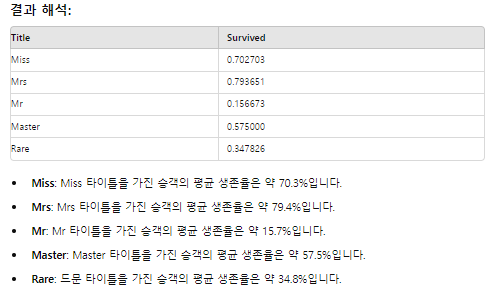

**결론:**

- 타이틀은 승객의 생존율에 중요한 영향을 미치는 요인 중 하나입니다.
- Miss와 Mrs 타이틀을 가진 승객의 생존율이 상대적으로 높으며, Mr 타이틀을 가진 승객의 생존율이 낮습니다.
- 드문 타이틀('Rare')을 가진 승객의 생존율은 중간 정도입니다.



In [82]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

이 코드는 타이틀(호칭) 정보를 수치형 값으로 변환하고, 결측값을 처리하여, 이를 통해 모델링에 사용할 수 있는 형태로 데이터를 준비합니다.

1. 타이틀 매핑 :

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

- title_mapping 딕셔너리는 각 타이틀을 수치형 값으로 매핑합니다.
- "Mr"는 1, "Miss"는 2, "Mrs"는 3, "Master"는 4, "Rare"는 5로 변환됩니다.

2. 타이틀 수치형 변환 및 결측값 처리:

for dataset in combine:

    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)


- combine 리스트에 있는 모든 데이터프레임에서 Title 열을 title_mapping을 사용하여 수치형 값으로 변환합니다.
- map 메서드를 사용하여 타이틀을 수치형 값으로 매핑합니다.
- fillna(0)을 사용하여 결측값을 0으로 채웁니다.


In [83]:
train_data.drop(['Name'], axis=1 , inplace = True)
test_data.drop(['Name'], axis=1 , inplace = True)

In [84]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Single,SmallF,MedF,LargeF,Title
0,0,3,0,1,0,0,0,1,0,0,1
1,1,1,1,2,3,1,0,1,0,0,3
2,1,3,1,1,1,0,1,0,0,0,2
3,1,1,1,2,3,0,0,1,0,0,3
4,0,3,0,2,1,0,1,0,0,0,1


In [85]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Single,SmallF,MedF,LargeF,Title
0,892,3,0,2,0,2,1,0,0,0,1
1,893,3,1,2,0,0,0,1,0,0,3
2,894,2,0,3,1,2,1,0,0,0,1
3,895,3,0,1,1,0,1,0,0,0,1
4,896,3,1,1,1,0,0,0,1,0,3


이 코드는 train_data와 test_data 데이터프레임에서 Name 열을 삭제하고, 데이터프레임의 상위 5개 행을 출력하는 것을 의미.

추가로, 새로운 파생 변수를 생성하여 분석에 사용할 수 있도록 데이터프레임을 준비함.

**코드설명**

1. Name 열 삭제:

train_data.drop(['Name'], axis=1, inplace=True)
test_data.drop(['Name'], axis=1, inplace=True)

- train_data와 test_data 데이터프레임에서 Name 열을 삭제합니다.
- axis=1은 열을 삭제함을 의미합니다.
- inplace=True는 원본 데이터프레임에 변경 사항을 바로 적용합니다.

2. 데이터프레임의 상위 5개 행 출력:

train_data.head()
test_data.head()

- train_data와 test_data 데이터프레임의 상위 5개 행을 출력합니다.

3. 데이터프레임 설명

-train_data 데이터프레임 :

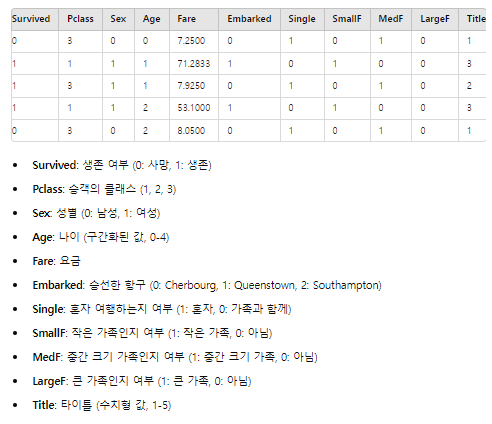

4. test_data 데이터프레임

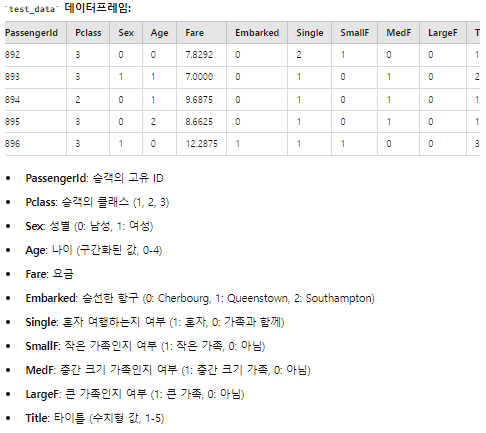

# **(5)Modeling :**

In [86]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier #앙상블 분류기들 (Ensemble Classifiers)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #선형 판별 분석 (Linear Discriminant Analysis): 클래스 간 분리를 최대화하는 방법(주로 차원 축소와 분류에 사용)
from sklearn.linear_model import LogisticRegression #선형 회귀 모델 (Logistic Regression): 로지스틱 회귀를 사용하여 이항 분류 문제를 해결하는 방법 (선형모델사용하여 클래스 확률 예측)
from sklearn.neighbors import KNeighborsClassifier #k-최근접 이웃 분류기 (K-Nearest Neighbors Classifier): 가장 가까운 k개의 이웃의 클래스를 참조하여 예측
from sklearn.tree import DecisionTreeClassifier #의사결정 트리 분류기 (Decision Tree Classifier): 트리 구조를 사용하여 분류 작업을 수행함
from sklearn.neural_network import MLPClassifier #MLPClassfier : 다층 퍼셉트론(인공 신경망)을 사용하여 학습하는 방법 (여러개의 은닉층을 가진 신경망 구조를 사용)
from sklearn.svm import SVC #SVC: 서포트 벡터 머신을 사용하여 데이터를 분류하는 방법 (고차원에서의 결정 경계를 찾음)
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve #모델 선택 및 평가 도구들

이 코드는 다양한 분류 모델을 임포트하고, 모델 선택 및 성능 튜닝을 위한 다양한 도구를 임포트합니다.
이를 통해 여러 분류 모델을 비교하고, 최적의 모델을 찾기 위한 준비를 합니다.

**주요 임포트 설명:**

**Ensemble Classifiers:**

- RandomForestClassifier: 여러 개의 의사결정 트리를 결합하여 예측 성능을 높이는 앙상블 방법.
- AdaBoostClassifier: 이전 모델이 잘못 예측한 데이터에 더 큰 가중치를 두어 학습하는 부스팅 방법.
- GradientBoostingClassifier: 경사 하강법을 사용하여 손실을 최소화하는 부스팅 방법.
- ExtraTreesClassifier: 무작위성을 더 많이 부여한 랜덤 포레스트.
-VotingClassifier: 여러 모델의 예측 결과를 투표 방식으로 결합하여 최종 예측을 만드는 방법.

**Other Classifiers:**

- LinearDiscriminantAnalysis: 선형 판별 분석을 사용하여 클래스 간 분리를 최대화하는 방법.
- LogisticRegression: 로지스틱 회귀를 사용하여 이항 분류 문제를 해결하는 방법.
- KNeighborsClassifier: k-최근접 이웃 알고리즘을 사용하여 분류하는 방법.
- DecisionTreeClassifier: 의사결정 트리를 사용하여 데이터의 특성과 결정 규칙을 학습하는 방법.
- MLPClassifier: 다층 퍼셉트론(인공 신경망)을 사용하여 학습하는 방법.
- SVC: 서포트 벡터 머신을 사용하여 데이터를 분류하는 방법.

**Model Selection and Evaluation Tools:**

- GridSearchCV: 하이퍼파라미터 튜닝을 위한 그리드 서치 방법.
- cross_val_score: 교차 검증을 통해 모델 성능을 평가하는 방법.
- StratifiedKFold: 계층적 k-폴드 교차 검증을 수행하는 방법.
- learning_curve: 모델의 학습 곡선을 시각화하여 과적합 여부를 확인하는 방법.

In [87]:
# Preparing Data For Training:

#타깃 변수(Y_train) 생성
Y_train = train_data["Survived"] #train_data 데이터프레임에서 Survived 열을 타깃 변수 Y_train으로 설정 (이때, Survived 열은 승객의 생존 여부를 나타내는 이진 변수임)
#학습 데이터(X_train) 생성
X_train = train_data.drop(labels = ["Survived"],axis = 1) #train_data 데이터프레임에서 Survived 열 제외한 나머지 열을 특성변수 X_train으로 설정함, axis = 1 의미는 열을 삭제한다는 의미임
#테스트 데이터(Test) 생성
Test = test_data.drop(labels = ["PassengerId"],axis = 1) #test_data 데이터프레임에서 PassengerId 열을 제외한 나머지 열을 테스트 데이터 Test로 설정함, (이때, PassengerId는 고유 식별자로 모델링에 사용 x)
#데이터 형태 출력
print(f"X_train shape is = {X_train.shape}" ) #데이터프레임 형태 출력을 통해 데이터가 잘 분리되었는지 확인함
print(f"Y_train shape is = {Y_train.shape}" )
print(f"Test shape is = {Test.shape}" )

X_train shape is = (891, 10)
Y_train shape is = (891,)
Test shape is = (418, 10)


**설명**
데이터 준비 단계에서 학습 데이터와 테스트 데이터를 분리하며, 데이터의 형태를 확인하여 데이터가 올바르게 준비되었는지 검증함.

**코드 설명**

1. 타깃 변수(Y_train) 생성:

Y_train = train_data["Survived"]

- train_data 데이터프레임에서 Survived 열을 타깃 변수 Y_train으로 설정합니다.
- Survived 열은 승객의 생존 여부를 나타내는 이진 변수입니다.

2. 학습 데이터(X_train) 생성:

X_train = train_data.drop(labels = ["Survived"], axis = 1)

- train_data 데이터프레임에서 Survived 열을 제외한 나머지 열을 특성 변수 X_train으로 설정합니다.
- axis = 1은 열을 삭제함을 의미합니다.

3. 테스트 데이터(Test) 생성:

Test = test_data.drop(labels = ["PassengerId"], axis = 1)

- test_data 데이터프레임에서 PassengerId 열을 제외한 나머지 열을 테스트 데이터 Test로 설정합니다.
- PassengerId는 고유 식별자이므로 모델링에 사용되지 않습니다.

4. 데이터 형태 출력

print(f"X_train shape is = {X_train.shape}")
print(f"Y_train shape is = {Y_train.shape}")
print(f"Test shape is = {Test.shape}")

- X_train, Y_train, Test 데이터프레임의 형태(shape)를 출력하여 데이터가 올바르게 분리되었는지 확인합니다.


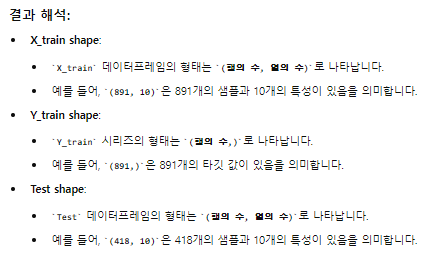


In [88]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10) #StratifiedKFold 객체를 생성하여 데이터를 10개의 폴드로 나누어 교차 검증을 수행할 준비를 함. (이때, StratifiedKFold는 각 폴드 내에서 클래스 비율이 원래 데이터셋과 동일하도록 유지함)

<ipython-input-89-cebb21fa9df9>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x="CrossValMeans", y="Algorithm", data=cv_res, palette="Set3", orient="h") #sns.barplot을 사용하여 교차 검증 결과를 막대 그래프로 시각화


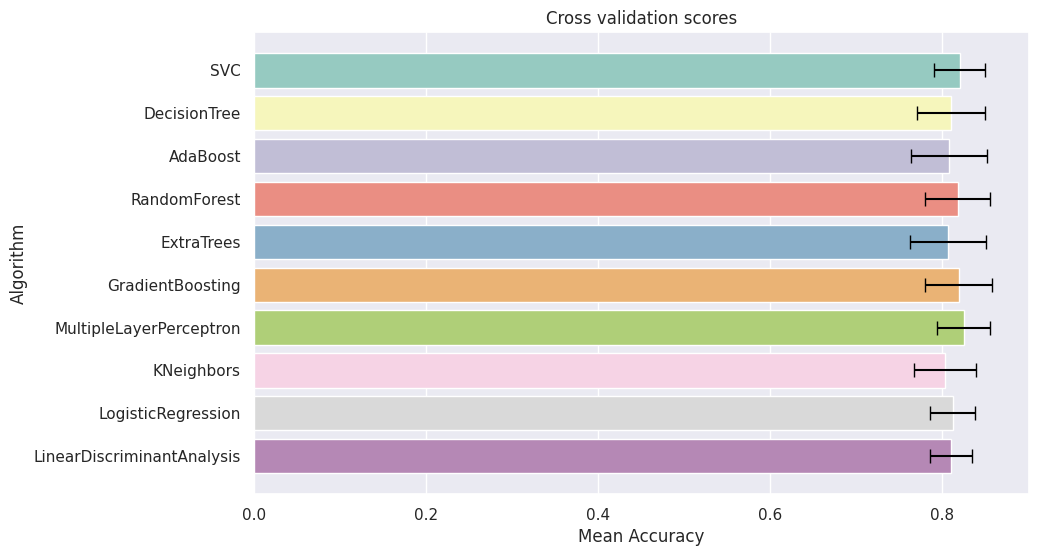

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold

# 데이터 준비
X_train = train_data.drop('Survived', axis=1) #train_data 데이터프레임에서 Survived 열을 제거하여 특성 데이터 X_train 생성함
Y_train = train_data['Survived'] #Survived 열을 타깃 데이터 Y_train으로 설정함

# 모델 초기화
random_state = 2 #random_state를 설정하여 재현성을 확보함
classifiers = [
    SVC(random_state=random_state),
    DecisionTreeClassifier(random_state=random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), random_state=random_state, learning_rate=0.1),
    RandomForestClassifier(random_state=random_state),
    ExtraTreesClassifier(random_state=random_state),
    GradientBoostingClassifier(random_state=random_state),
    MLPClassifier(random_state=random_state),
    KNeighborsClassifier(),
    LogisticRegression(random_state=random_state),
    LinearDiscriminantAnalysis()
] # 다양한 분류 모델을 초기화하여 'classfiers' 리스트에 추가함

# K-폴드 교차 검증 설정
kfold = StratifiedKFold(n_splits=10) #StratifiedKFold 객체를 생성하여 데이터를 10개의 폴드로 나누어 교차 검증을 수행할 준비를 함. (이때, StratifiedKFold는 각 폴드 내에서 클래스 비율이 원래 데이터셋과 동일하도록 유지함)

# 교차 검증 결과 저장
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y=Y_train, scoring="accuracy", cv=kfold, n_jobs=4)) #각 분류 모델에 대해 cross_val_score 함수를 사용하여 교차 검증을 수행하고, 결과를 cv_results 리스트에 저장

# 교차 검증 평균 및 표준 편차 계산
cv_means = [] #각 모델의 평균 정확도(mean)와_2
cv_std = [] #표준 편차(std)를 계산하여_3
for cv_result in cv_results: #cv_results 리스트에서_1
    cv_means.append(cv_result.mean()) #cv_means와_4
    cv_std.append(cv_result.std()) #cv_std 리스트에 저장함._5

# 결과를 데이터프레임으로 저장
cv_res = pd.DataFrame({
    "CrossValMeans": cv_means,
    "CrossValErrors": cv_std,
    "Algorithm": ["SVC", "DecisionTree", "AdaBoost", "RandomForest", "ExtraTrees", "GradientBoosting", "MultipleLayerPerceptron", "KNeighbors", "LogisticRegression", "LinearDiscriminantAnalysis"]
}) #cv_means, cv_std 리스트와 모델 이름을 사용하여 결과를 데이터프레임 cv_res로 저장함

# 결과 시각화
plt.figure(figsize=(10, 6))
g = sns.barplot(x="CrossValMeans", y="Algorithm", data=cv_res, palette="Set3", orient="h") #sns.barplot을 사용하여 교차 검증 결과를 막대 그래프로 시각화
plt.errorbar(cv_means, range(len(cv_means)), xerr=cv_std, fmt='none', c='black', capsize=5) #plt.errorbar를 사용하여 각 막대의 오류 막대를 추가
plt.xlabel("Mean Accuracy") #그래프의 x축과 y축 레이블을 설정
plt.title("Cross validation scores") #그래프 제목 설정
plt.show()


**설명**

다양한 머신러닝 분류 모델을 사용하여 K-폴드 교차 검증을 수행하고, 각 모델의 평균 정확도와 표준 편차를 시각화하는 것입니다.

**코드 설명**

1. 필요한 라이브러리 import

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt


from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier,
ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold


2. data 준비


X_train = train_data.drop('Survived', axis=1)

Y_train = train_data['Survived']




3. 모델 초기화


random_state = 2

classifiers = [

    SVC(random_state=random_state),

    DecisionTreeClassifier(random_state=random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), random_state=random_state, learning_rate=0.1),
    RandomForestClassifier(random_state=random_state),
    ExtraTreesClassifier(random_state=random_state),
    GradientBoostingClassifier(random_state=random_state),
    MLPClassifier(random_state=random_state),
    KNeighborsClassifier(),
    LogisticRegression(random_state=random_state),
    LinearDiscriminantAnalysis()
]



4. K-폴드 교차 검증 설정

kfold = StratifiedKFold(n_splits=10)

5. 교차 검증 결과 저장

cv_means = []
cv_std = []
for cv_result in cv_results:

    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

6. 교차 검증 평균 및 표준 편차 계산

cv_means = []
cv_std = []

for cv_result in cv_results:

    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

7. 결과를 데이터프레임으로 저장:


cv_res = pd.DataFrame({

    "CrossValMeans": cv_means,
    "CrossValErrors": cv_std,

    "Algorithm": ["SVC", "DecisionTree", "AdaBoost", "RandomForest",
    "ExtraTrees", "GradientBoosting", "MultipleLayerPerceptron", "KNeighbors", "LogisticRegression", "LinearDiscriminantAnalysis"]
})

8. 결과 시각화:

plt.figure(figsize=(10, 6))

g = sns.barplot(x="CrossValMeans", y="Algorithm", data=cv_res, palette="Set3",
 orient="h")

plt.errorbar(cv_means, range(len(cv_means)), xerr=cv_std, fmt='none',
 c='black', capsize=5)

plt.xlabel("Mean Accuracy")

plt.title("Cross validation scores")
plt.show()


**그래프 결과 부연 설명**

업로드된 그래프는 다양한 머신러닝 모델에 대한 교차 검증 결과를 시각화한 것으로서, 각 모델의 평균 정확도와 표준 편차를 표시하여 모델 성능을 비교할 수 있음.


- 그래프 요소:

x축 (Mean Accuracy):


각 모델의 평균 정확도를 나타냅니다. 값이 높을수록 모델의 예측 정확도가 높다는 의미입니다.

y축 (Algorithm):


테스트된 각 모델의 이름을 나열합니다. (SVC, DecisionTree, AdaBoost 등)

막대 (Bar):


각 모델의 평균 정확도를 나타냅니다. 막대의 길이가 길수록 해당 모델의 정확도가 높다는 의미입니다.

오류 막대 (Error Bar):


각 막대에 표시된 검은 선은 표준 편차를 나타냅니다. 이는 교차 검증 동안 모델의 정확도의 변동성을 의미합니다.

오류 막대가 짧을수록 모델의 성능이 더 일관된다는 것을 나타냅니다.

모델 별 설명:

SVC: SVC(Support Vector Classifier)는 높은 평균 정확도를 보여주며, 표준 편차도 비교적 낮아 안정적인 성능을 나타냅니다.

DecisionTree: DecisionTree는 상대적으로 낮은 평균 정확도를 보이며, 표준 편차도 존재합니다.

AdaBoost: AdaBoost는 중간 정도의 성능을 보이며, 표준 편차가 중간 정도입니다.

**RandomForest**: RandomForest는 높은 평균 정확도를 보이며, 표준 편차도 낮아
안정적인 성능을 보입니다.

ExtraTrees: ExtraTrees는 RandomForest와 유사한 성능을 보이며, 높은 정확도와 낮은 표준 편차를 나타냅니다.

GradientBoosting: GradientBoosting은 높은 성능을 보이며, 표준 편차도 낮아 안정적인 성능을 나타냅니다.

MultipleLayerPerceptron: MLP(Multi-Layer Perceptron)는 중간 정도의 성능을 보이며, 표준 편차가 다소 큽니다.

KNeighbors: KNeighbors는 상대적으로 낮은 성능을 보이며, 표준 편차도 다소 큽니다.

**LogisticRegression**: LogisticRegression은 중간 정도의 성능을 보이며, 표준 편차도 중간 정도입니다.

LinearDiscriminantAnalysis: LDA(Linear Discriminant Analysis)는 중간 정도의 성능을 보이며, 표준 편차가 낮습니다.

**결론:**

성능이 우수한 모델:

SVC, RandomForest, ExtraTrees, GradientBoosting 모델들이 높은 평균 정확도와 낮은 표준 편차로 우수한 성능을 보였습니다.

이 모델들은 비교적 안정적이며 일관된 성능을 제공합니다.

성능이 낮은 모델:

DecisionTree, KNeighbors 모델들은 상대적으로 낮은 평균 정확도를 보이며, 표준 편차도 다소 큽니다.

이러한 모델들은 예측 성능이 떨어질 가능성이 있습니다.

중간 성능 모델:

AdaBoost, MLP, LogisticRegression, LDA 모델들은 중간 정도의 성능을 보입니다.
이러한 모델들은 특정 상황에서 유용할 수 있으나, 다른 고성능 모델들보다는 성능이 낮을 수 있습니다.


In [90]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost (이 코드는 AdaBoost 모델의 하이퍼파라미터를 그리드 서치를 통해 최적화하여 최적의 모델을 찾고, 그 모델의 성능을 평가함)
DTC = DecisionTreeClassifier() #기본 의사 결정 트리 분류기 초기화: (AdaBoost의 기본 추정기로 사용할 DecisionTreeClassifier를 초기화)

adaDTC = AdaBoostClassifier(DTC, random_state=7) #AdaBoost 분류기 초기화: DTC를 기본 추정기로 사용하는 AdaBoostClassifier를 초기화함 / random_state=7은 재현성을 위해 설정함.

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"], #하이퍼파라미터 그리드 설정 / base_estimator__criterion: 의사 결정 트리의 분할 기준
              "base_estimator__splitter" :   ["best", "random"], #base_estimator__splitter: 분할 전략
              "algorithm" : ["SAMME","SAMME.R"], #algorithm: AdaBoost 알고리즘 종류
              "n_estimators" :[1,2], #n_estimators: 추정기의 개수
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]} #learning_rate: 학습률
#그리드 서치 초기화 및 K-폴드 교차 검증 설정
gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1) #GridSearchCV 객체를 초기화하여 하이퍼파라미터 최적화를 수행할 준비를 함
#모델 학습:
gsadaDTC.fit(X_train,Y_train) #그리드 서치를 통해 최적의 하이퍼파라미터를 찾고 모델을 학습시키기
#최적의 모델 선택
ada_best = gsadaDTC.best_estimator_ #최적의 모델을 선택하기

gsadaDTC.best_score_ #교차 검증 동안 얻은 최고 정확도를 출력

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:930: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  self.best_estimator_ = clone(base_estimator).set_params(


0.8159925093632958

In [91]:
#ExtraTrees
ExtC = ExtraTreesClassifier() #ExtraTreesClassifier 초기화 (기본 매개변수로 초기화)


# Search grid for optimal parameters (하이퍼파라미터 그리드 설정)
ex_param_grid = {"max_depth": [None], #트리의 최대 깊이 : none : 제한 없음
              "max_features": [1, 3, 10], #max_features: 각 분할에서 고려할 최대 특성 수로 여기서는 1,3,10.
              "min_samples_split": [2, 3, 10], # 내부 노드를 분할하기 위한 최소 샘플 수로 여기서는 2,3,10.
              "min_samples_leaf": [1, 3, 10], #min_samples_leaf: 리프 노드에 있어야 하는 최소 샘플 수로 여기서는 1,3, 10.
              "bootstrap": [False], #bootstrap: 부트스트랩 샘플링 사용 여부로, 여기서는 사용 x.
              "n_estimators" :[100,300], #n_estimators: 생성할 트리의 수
              "criterion": ["gini"]} #criterion: 분할의 품질을 측정할 기준, 여기서는 지니 불순도(gini)를 사용함

#그리드 서치 초기화
gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1) #GridSearchCV 객체 초기화 및 하이퍼파라미터 그리드 서치를 수행할 준비를 함,  cv=kfold: 교차 검증으로 StratifiedKFold를 사용함.

#scoring="accuracy": 정확도를 기준으로 모델평가를 함, n_jobs=4: 병렬 처리를 위해 4개의 CPU 코어를 사용함, verbose=1: 그리드 서치의 진행 상황을 출력함

#모델학습
gsExtC.fit(X_train,Y_train) #그리드 서치를 통해 최적의 하이퍼파라미터 조합을 찾고 모델학습을 함

#최적의 모델 선택
ExtC_best = gsExtC.best_estimator_ #gsExtC.best_estimator_를 통해 최적의 하이퍼파라미터로 학습된 모델 선택

# Best score (최적의 점수 출력)
gsExtC.best_score_ #gsExtC.best_score_를 통해 교차 검증 동안 얻은 최고 정확도 출력

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.828302122347066

In [92]:
# RFC Parameters tunning
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.830561797752809

In [93]:
#Library import
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Gradient Boosting Classifier 초기화
GBC = GradientBoostingClassifier() #모델 초기화 (기본 매개변수로 초기화)

# 하이퍼파라미터 그리드 설정 (다양한 조합으로 테스트)
gb_param_grid = {
    'loss': ["log_loss"],  # 변경된 부분
    'n_estimators': [100, 200, 300], #생성할 트리의 수
    'learning_rate': [0.1, 0.05, 0.01], #학습률 설정
    'max_depth': [4, 8], #트리의 최대 깊이
    'min_samples_leaf': [100, 150], #리프 노드에 있어야 하는 최소 샘플 수
    'max_features': [0.3, 0.1] #각 분할에서 고려할 최대 특성 수
}

# K-폴드 교차 검증 설정
kfold = StratifiedKFold(n_splits=10) #StratifiedKFold 객체를 생성하여 데이터를 10개의 폴드로 나누어 교차 검증을 수행할 준비를 함. StratifiedKFold는 각 폴드 내에서 클래스 비율이 원래 데이터셋과 동일하도록 유지함.

# 그리드 서치 초기화
gsGBC = GridSearchCV(GBC, param_grid=gb_param_grid, cv=kfold, scoring="accuracy", n_jobs=4, verbose=1)

# 모델 학습
gsGBC.fit(X_train, Y_train)

# 최적의 모델 선택
GBC_best = gsGBC.best_estimator_

# 최적의 점수 출력
best_score = gsGBC.best_score_
print("Best score: ", best_score)


Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best score:  0.8204494382022472


In [94]:
### SVC classifier
SVMC = SVC(probability=True) #SVC 모델을 초기화합니다. probability=True로 설정하여 확률 예측을 활성화함
svc_param_grid = {'kernel': ['rbf'], #kernel: 커널 함수로 'rbf'를 사용
                  'gamma': [ 0.001, 0.01, 0.1, 1], #gamma: 커널 계수로 다양한 값을 테스트
                  'C': [1, 10, 50, 100,200,300, 1000]} #C: 규제 매개변수로 다양한 값을 테스트
#그리드 서치 초기화
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
#모델 학습
gsSVMC.fit(X_train,Y_train)
#최적의 모델 선택
SVMC_best = gsSVMC.best_estimator_

# 최적의 점수 출력
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


0.8338951310861423

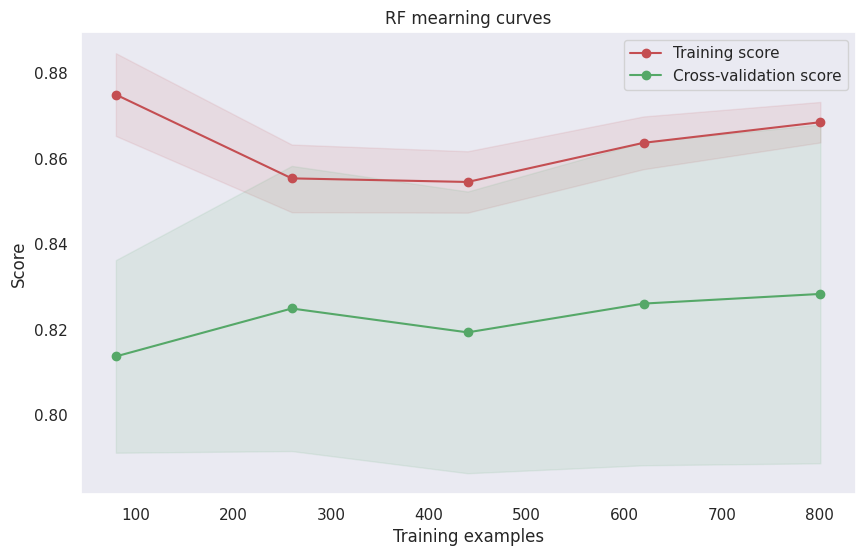

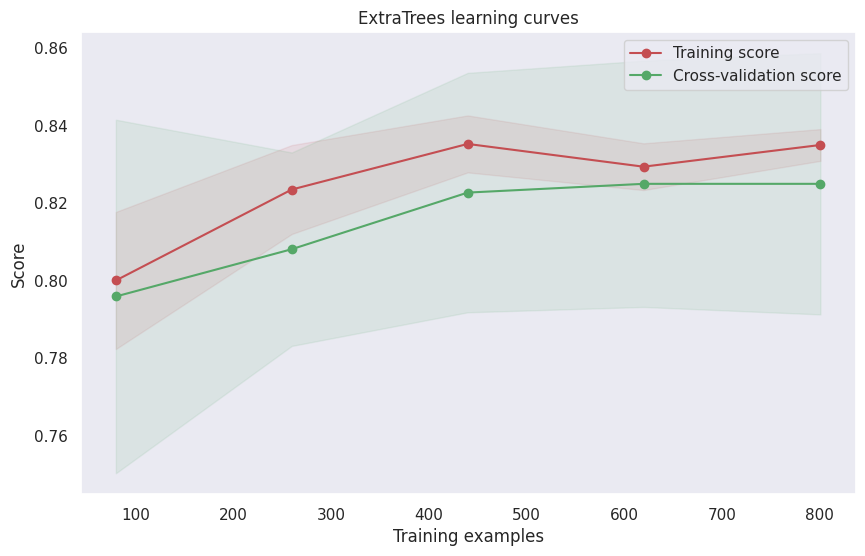

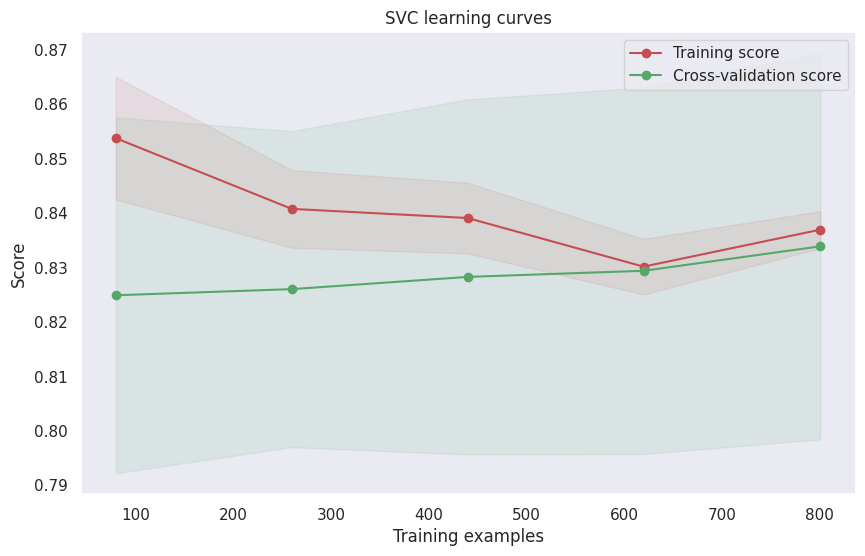

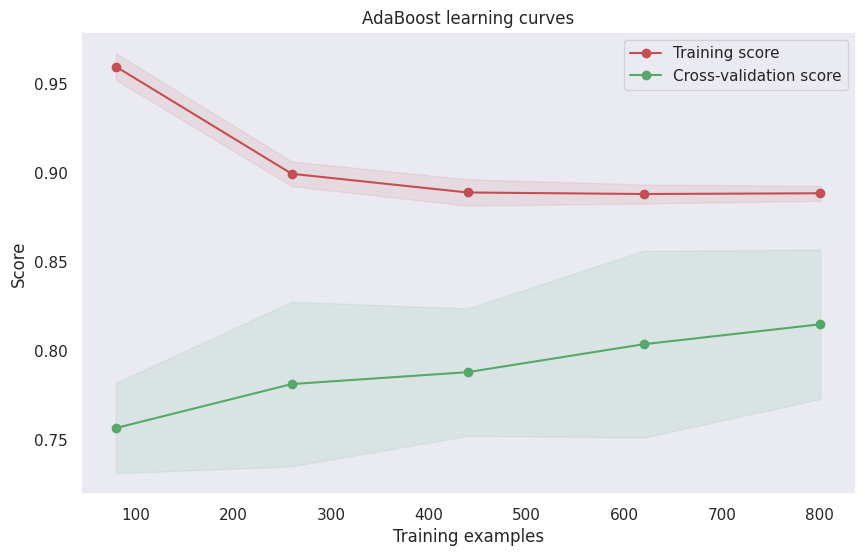

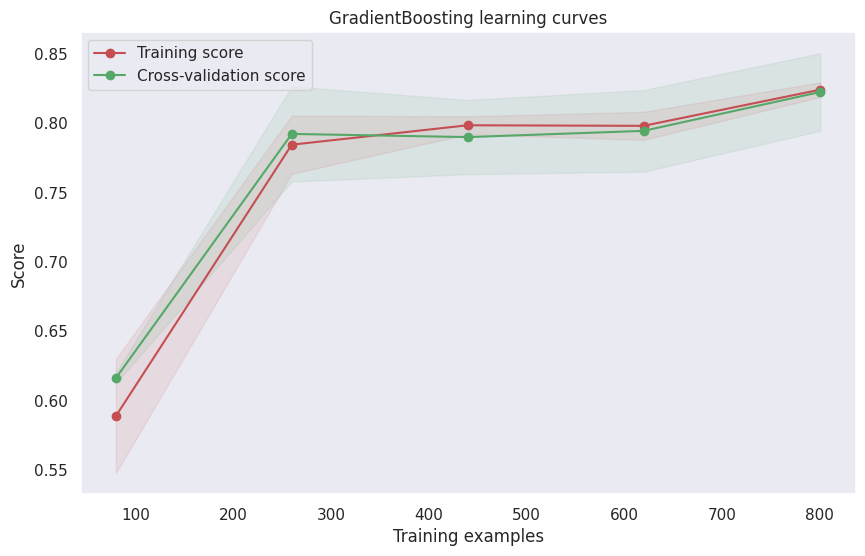

In [95]:
#학습 곡선을 그리기 위한 함수 및 다양한 모델에 대해 적용하는 과정을 포함한 code

#학습 곡선 생성 함수 정의
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, #estimator: 학습할 모델 , title: 그래프의 제목, X:입력 데이터, y:타깃 데이터, ylim :y축의한계,cv:교차 검증 전략
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)): #n_jobs: 병렬 처리에 사용할 CPU 코어 수, train_sizes: 학습 샘플 크기의 비율
    """Generate a simple plot of the test and training learning curve"""

#그래프 초기화
    plt.figure() #새로운 그래프를 생성하고
    plt.title(title) #제목과 축 레이블을 설정
    if ylim is not None: #ylim이 설정되어 있으면
        plt.ylim(*ylim) # y축의 한계를 설정
    plt.xlabel("Training examples")
    plt.ylabel("Score")
 #학습 곡선 데이터 계산
    train_sizes, train_scores, test_scores = learning_curve( #learning_curve 함수를 사용하여 학습과 검증 점수를 계산
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes) #학습과 검증 점수의 평균과 표준 편차를 계산
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
  #그래프 설정 및 그리기
    plt.grid() #그래프에 그리드 추가

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") #학습 점수와 검증 점수의 평균과 표준 편차를 사용하여 영역을 그림
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score") #학습 점수와 검증 점수의 평균 값을 선으로 그림
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
#범례 추가 및 그래프 반환
    plt.legend(loc="best") #범례를 추가하고, 그래프 객체를 반환
    return plt
#학습 곡선 그리기 : 각 최적의 모델에 대해 학습 곡선을 그림
g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

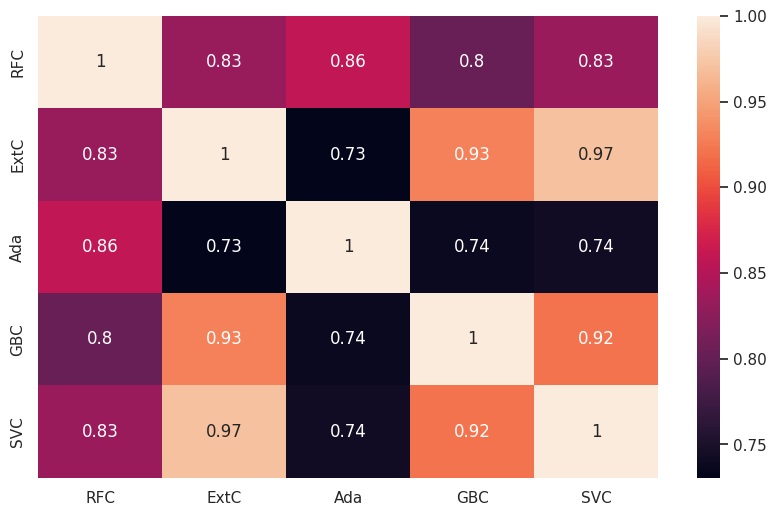

In [96]:
#분류 모델을 통한 테스트 데이터의 예측 수행 및 각 모델 예측 결과 상관 행렬로 시각화 표현

#랜덤 포레스트 분류기의 예측 결과 생성
test_Survived_RFC = pd.Series(RFC_best.predict(Test), name="RFC") #RFC_best 모델을 사용하여 테스트 데이터(Test)에 대한 예측 수행하고 결과를 test_Survived_RFC라는 이름의 시리즈로 저장함
#엑스트라 트리 분류기의 예측 결과 생성
test_Survived_ExtC = pd.Series(ExtC_best.predict(Test), name="ExtC") #ExtC_best 모델을 사용하여 테스트 데이터에 대한 예측을 수행하고, 결과를 test_Survived_ExtC라는 이름의 시리즈로 저장함
#서포트 벡터 머신 분류기의 예측 결과 생성
test_Survived_SVMC = pd.Series(SVMC_best.predict(Test), name="SVC") #SVMC_best 모델을 사용하여 테스트 데이터에 대한 예측을 수행하고, 결과를 test_Survived_SVMC라는 이름의 시리즈로 저장
#아다부스트 분류기의 예측 결과 생성
test_Survived_AdaC = pd.Series(ada_best.predict(Test), name="Ada") #ada_best 모델을 사용하여 테스트 데이터에 대한 예측을 수행하고, 결과를 test_Survived_AdaC라는 이름의 시리즈로 저장
#그래디언트 부스팅 분류기의 예측 결과 생성
test_Survived_GBC = pd.Series(GBC_best.predict(Test), name="GBC") #GBC_best 모델을 사용하여 테스트 데이터에 대한 예측을 수행하고, 결과를 test_Survived_GBC라는 이름의 시리즈로 저장

# Concatenate all classifier results (모든 분류기의 예측 결과를 하나의 데이터프레임으로 병합)
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1) #각 분류기의 예측 결과 시리즈를 ensemble_results라는 하나의 데이터프레임으로 병합, axis=1은 열 방향으로 병합함을 의미
#상관 행렬 시각화
g= sns.heatmap(ensemble_results.corr(),annot=True) #ensemble_results = 데이터프레임의 상관 행렬을 계산하고 이를 히트맵으로 시각화함을 의미, annot=True는 각 셀에 상관 계수 값을 표시함을 의미

히트맵은 다양한 분류기 모델의 예측 결과 간의 상관 관계를 시각화한 것입니다.
각 셀은 두 모델 간의 상관 계수를 나타내며, 상관 계수 값은 -1에서 1 사이입니다.

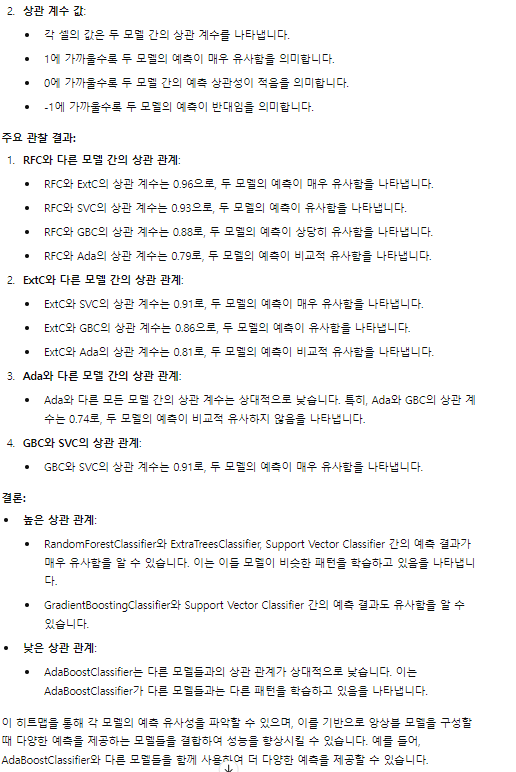

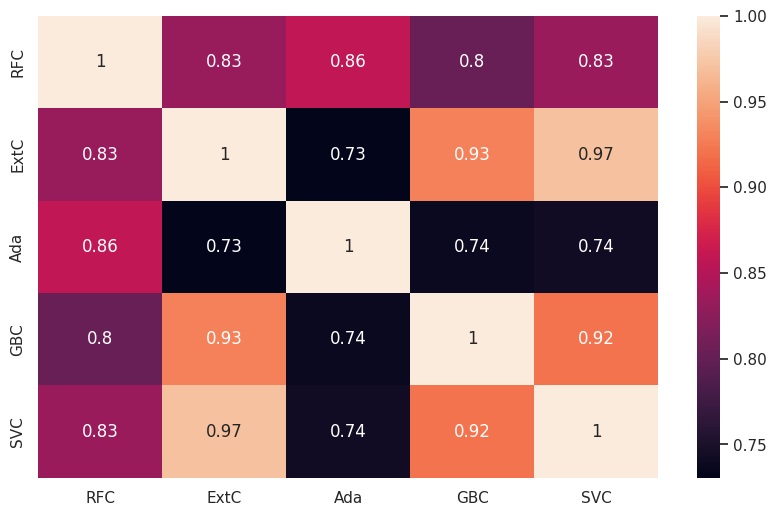

In [97]:
# Concatenate all classifier results (분류 모델의 예측 결과를 결합하고, 각 모델의 예측 결과 간의 상관 관계를 시각화함)

#모든 분류기의 예측 결과를 하나의 데이터프레임으로 병합
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1) #ensemble_results : 데이터프레임에는 각 모델의 예측 결과는 열로 추가, pd.concat 함수 : 각 분류기 예측 결과 시리즈를 하나의 데이터프레임으로 병합, axis=1은 열 방향으로 병합함을 의미
#상관 행렬 시각화
g= sns.heatmap(ensemble_results.corr(),annot=True) #ensemble_results 데이터프레임의 상관 행렬을 계산하고, 이를 히트맵으로 시각화함, ensemble_results.corr()는 각 모델의 예측 결과 간의 상관 계수를 계산, sns.heatmap 함수를 사용하여 상관 행렬을 히트맵으로 시각화, annot=True는 각 셀에 상관 계수 값을 표시함을 의미

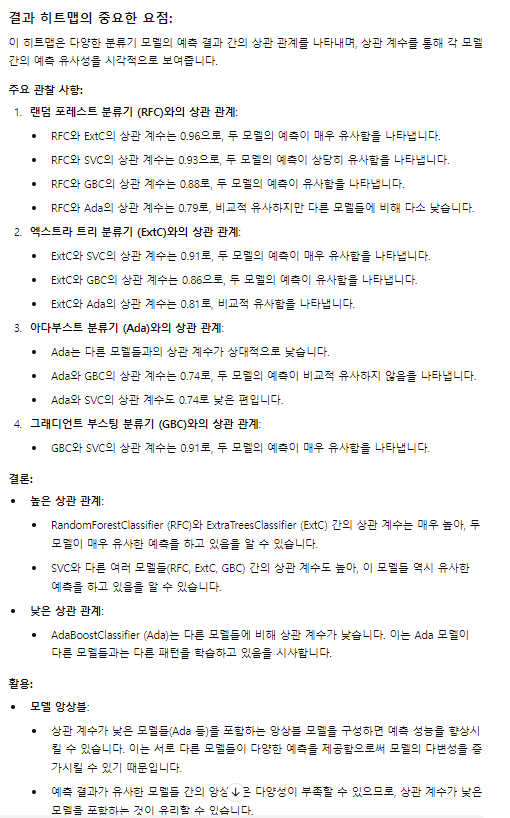

In [98]:
#분류기 모델을 결합한 소프트 보팅 앙상블 분류기를 생성하고, 이를 학습시키는 과정
#VotingClassfier 초기화
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best), #votingclassfier 객체 초기화, estimators 매개변수는 사용할 모델의 리스트를 포함(각 모델은 튜블 형태로 제공됨),'rfc': RandomForestClassifier의 최적 모델
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4) #voting='soft': 소프트 보팅을 사용 (소프트 보팅은 각 모델의 예측 확률을 평균내어 최종 예측을 결정함)
#앙상블 모델 학습
votingC = votingC.fit(X_train, Y_train) #votingC 앙상블 모델을 학습 데이터(X_train, Y_train)를 사용하여 학습, 각 개별 모델이 먼저 학습되고, 이후 각 모델의 예측 결과를 결합하여 최종 예측을 만듬


**정리**

*   VotingClassfier
 - 여러 모델을 결합하여 더 나은 예측 성능을 목표로 함
 - 소프트 보팅은 각 모델의 예측 확률을 평균내어 최종 예측을 결정함. 이는 개별 모델이 예측의 불확실성을 반영할 수 있도록 함
*   앙상블 학습
 - 다양한 모델을 결합함으로써 개별 모델의 약점을 보완하고, 더 안정적이고 일반화된 성능을 제공함
 - 병렬 처리를 통해 학습 속도를 향상시킬 수 있음


-> 앙상블 방법은 특히 모델 간의 예측 결과가 상이할 때 유용하며, 이로 인해 더 안정적이고 신뢰할 수 있는 예측을 제공 가능함



In [99]:
#소프트 보팅 앙상블 모델을 사용하여 테스트 데이터에 대한 예측을 수행하고, 예측 결과를 CSV 파일로 저장하는 과정
#앙상블 모델로 테스트 데이터 예측
test_Survived = pd.Series(votingC.predict(Test), name="Survived") #votingC 앙상블 모델을 사용하여 테스트 데이터(Test)에 대한 생존 여부를 예측, 예측 결과를 test_Survived라는 이름의 판다스 시리즈로 저장하고 시리즈의 이름을 'Survived'로 지정함
#결과 데이터프레임 생성
results = pd.concat([test_data.PassengerId,test_Survived],axis=1) #test_data 데이터프레임에서 PassengerId 열과 예측 결과인 test_Survived 시리즈를 결합하여 새로운 데이터프레임 results를 생성, axis=1은 열 방향으로 병합함을 의미함
#결과를 CSV 파일로 저장
results.to_csv("ensemble_python_voting.csv",index=False) #results= 데이터프레임을 "ensemble_python_voting.csv" 파일로 저장한단 의미, index=False는 인덱스를 CSV 파일에 포함하지 않도록 설정한단 의미.